In [1]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
plt.style.use('classic')
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_validate
import pydotplus
from six import StringIO

In [2]:
data=pd.read_csv("Data.csv")

In [3]:
data.head(15)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,Carry out & Take away,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,Restaurant(<20),2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,Bar,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 

Categorical variables: 17
Integer variables: 8


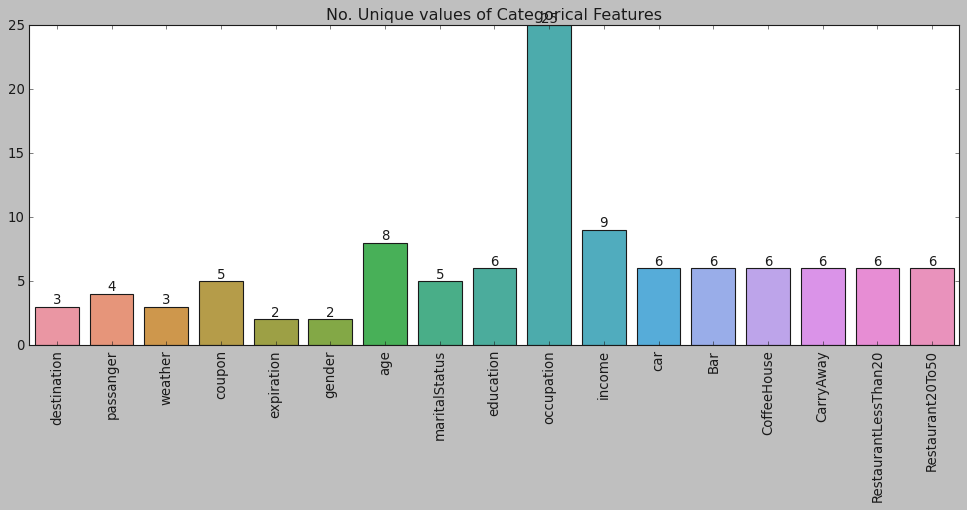

In [6]:
unique_values = []
for col in object_cols:
    unique_values.append(data[col].unique().size)
plt.figure(figsize=(15,5))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
ax=sns.barplot(x=object_cols,y=unique_values)
ax.bar_label(ax.containers[0])
plt.show()

In [7]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
passanger                0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
temperature              0.000000
weather                  0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [8]:
data=data.drop('car', axis=1)

In [9]:
data = data.dropna()

In [10]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

destination             0.0
passanger               0.0
direction_opp           0.0
direction_same          0.0
toCoupon_GEQ25min       0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ5min        0.0
Restaurant20To50        0.0
RestaurantLessThan20    0.0
CarryAway               0.0
CoffeeHouse             0.0
Bar                     0.0
income                  0.0
occupation              0.0
education               0.0
has_children            0.0
maritalStatus           0.0
age                     0.0
gender                  0.0
expiration              0.0
coupon                  0.0
temperature             0.0
weather                 0.0
Accept(Y/N?)            0.0
dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   coupon                12079 non-null  object
 5   expiration            12079 non-null  object
 6   gender                12079 non-null  object
 7   age                   12079 non-null  object
 8   maritalStatus         12079 non-null  object
 9   has_children          12079 non-null  int64 
 10  education             12079 non-null  object
 11  occupation            12079 non-null  object
 12  income                12079 non-null  object
 13  Bar                   12079 non-null  object
 14  CoffeeHouse           12079 non-null  object
 15  CarryAway             12079 non-nul

In [12]:
for i in data.select_dtypes("O").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data[i].value_counts())

#######################  

destination


No Urgent Place    5970
Home               3085
Work               3024
Name: destination, dtype: int64
#######################  

passanger


Alone        6969
Friend(s)    3148
Partner      1024
Kid(s)        938
Name: passanger, dtype: int64
#######################  

weather


Sunny    9601
Snowy    1331
Rainy    1147
Name: weather, dtype: int64
#######################  

coupon


Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64
#######################  

expiration


1d    6760
2h    5319
Name: expiration, dtype: int64
#######################  

gender


Female    6199
Male      5880
Name: gender, dtype: int64
#######################  

age


21         2537
26         2399
31         1925
50plus     1732
36         1253
41         1065
46          664
below21     504
Name: age, dtype: int64
#######################

<Figure size 1280x480 with 0 Axes>

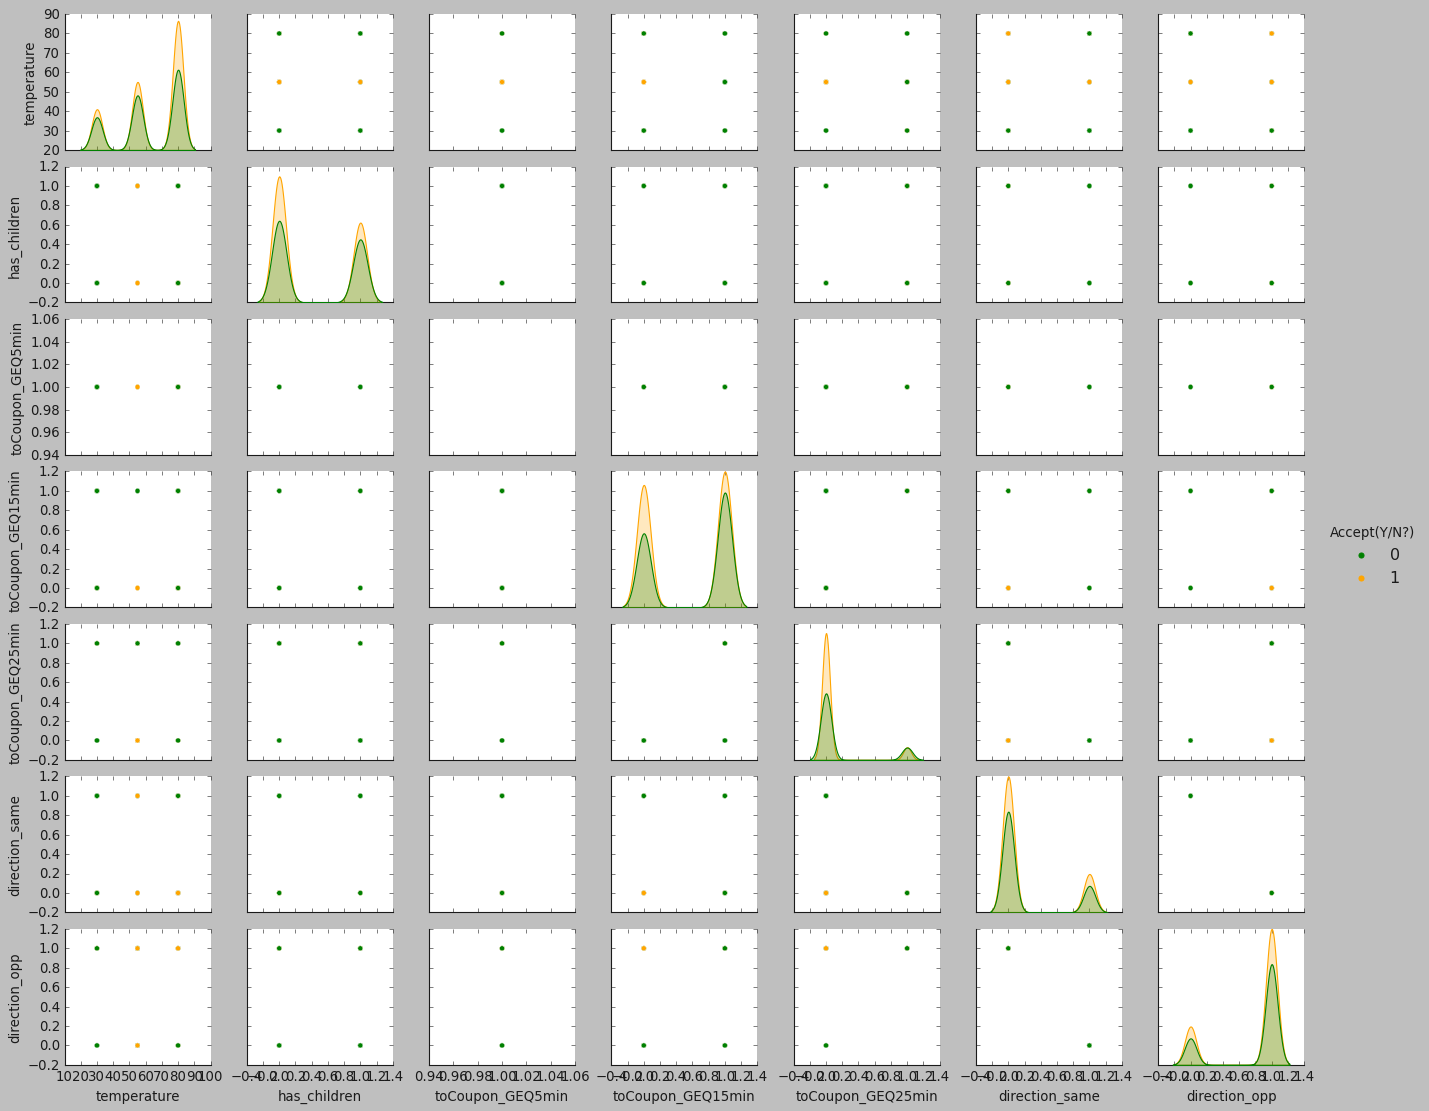

In [13]:
plt.figure(figsize=(16,6))
sns.set_palette(sns.color_palette(["green", "orange"]))
sns.pairplot(data, hue='Accept(Y/N?)')
fig=plt.gcf()
fig.set_size_inches(18,14)
#plt.show()

# we need some updates in data set

In [14]:
data.expiration.replace({'1d':'24h'},inplace=True)

In [15]:
data.expiration.value_counts()

24h    6760
2h     5319
Name: expiration, dtype: int64

In [16]:
data.Bar.value_counts()

never    4934
less1    3394
1~3      2370
4~8      1054
gt8       327
Name: Bar, dtype: int64

In [17]:
data.Bar.replace({'1~3':'1 to 3'},inplace=True)
data.Bar.replace({'4~8':'4 to 8'},inplace=True)
data.Bar.replace({'gt8':'Greater then 8'},inplace=True)

In [18]:
data.CoffeeHouse.replace({'1~3':'1 to 3'},inplace=True)
data.CoffeeHouse.replace({'4~8':'4 to 8'},inplace=True)
data.CoffeeHouse.replace({'gt8':'Greater then 8'},inplace=True)

In [19]:
data.CarryAway.replace({'1~3':'1 to 3'},inplace=True)
data.CarryAway.replace({'4~8':'4 to 8'},inplace=True)
data.CarryAway.replace({'gt8':'Greater then 8'},inplace=True)

In [20]:
data.Restaurant20To50.replace({'1~3':'1 to 3'},inplace=True)
data.Restaurant20To50.replace({'4~8':'4 to 8'},inplace=True)
data.Restaurant20To50.replace({'gt8':'Greater then 8'},inplace=True)

In [21]:
data.RestaurantLessThan20.replace({'1~3':'1 to 3'},inplace=True)
data.RestaurantLessThan20.replace({'4~8':'4 to 8'},inplace=True)
data.RestaurantLessThan20.replace({'gt8':'Greater then 8'},inplace=True)

In [22]:
data.rename(columns={'Accept(Y/N?)':'Accept'}, inplace=True)

In [23]:
def univariate_analysis(column_name):
    data_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    data_EDA['Total_Count'] = list(data.groupby(column_name).Accept.count())
    data_EDA['Accepted'] = list(data[data.Accept==1].groupby(column_name).Accept.count())
    data_EDA['Rejected'] = list(data[data.Accept==0].groupby(column_name).Accept.count())
    data_EDA['% Of Accepted'] = round(data_EDA['Accepted']/data_EDA['Total_Count']*100,3)
    data_EDA['% Of Rejected'] = round(data_EDA['Rejected']/data_EDA['Total_Count']*100,3)
    data_EDA = data_EDA.sort_values(by='% Of Accepted', ascending=False)
    return data_EDA

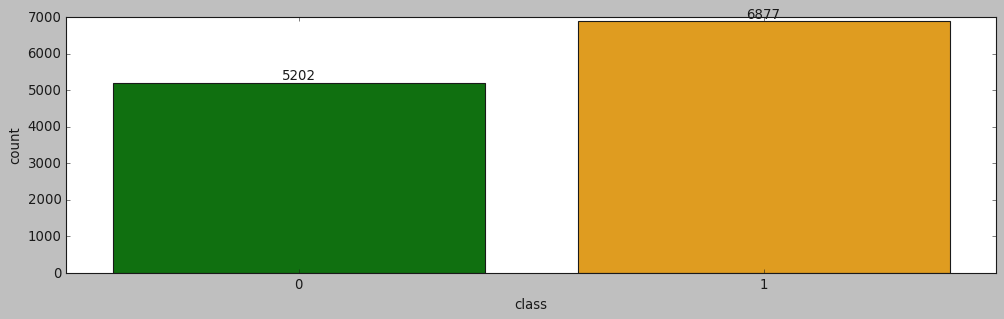

In [24]:
plt.figure(figsize=(15,4))
class_data=data["Accept"].value_counts().reset_index()
class_data.columns=["class","count"]
xticks(rotation=0)
ax=sns.barplot(x="class",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

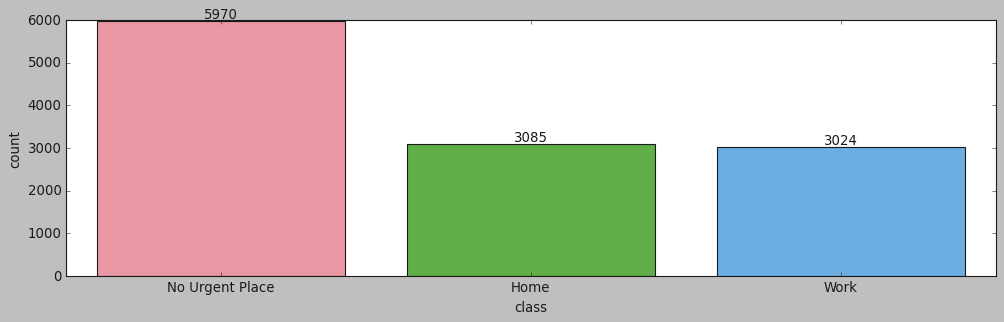

In [25]:
plt.figure(figsize=(15,4))
class_data=data["destination"].value_counts().reset_index()
class_data.columns=["class","count"]
xticks(rotation=0)
ax=sns.barplot(x="class",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

In [26]:
univariate_analysis('destination')

,destination,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
1,No Urgent Place,5970,3785,2185,63.400,36.600
0,Home,3085,1568,1517,50.827,49.173
2,Work,3024,1524,1500,50.397,49.603


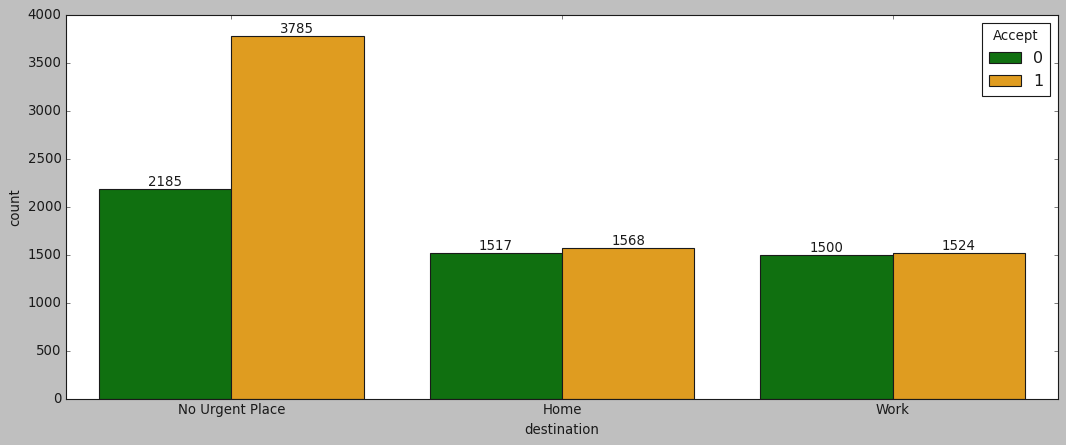

In [27]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="destination",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [28]:
univariate_analysis('passanger')

,passanger,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
1,Friend(s),3148,2129,1019,67.630,32.370
3,Partner,1024,609,415,59.473,40.527
0,Alone,6969,3673,3296,52.705,47.295
2,Kid(s),938,466,472,49.680,50.320


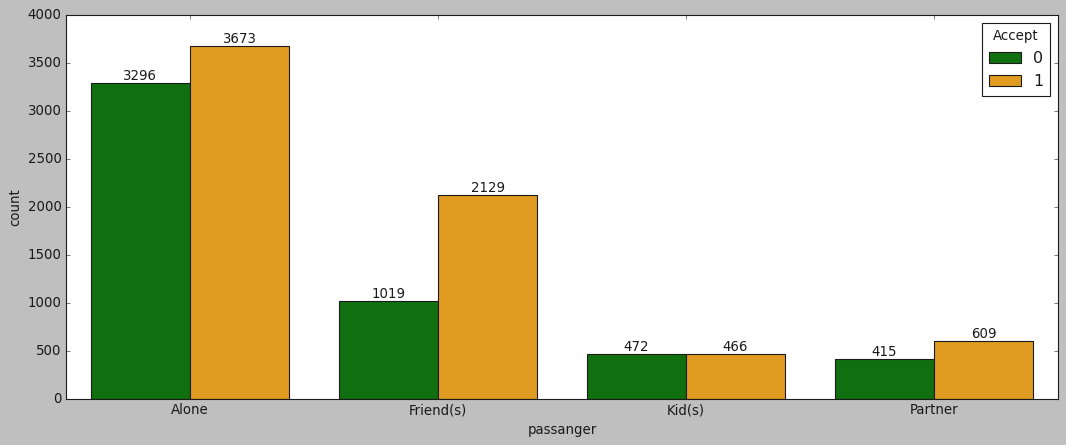

In [29]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="passanger",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [30]:
univariate_analysis('weather')

,weather,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
2,Sunny,9601,5713,3888,59.504,40.496
1,Snowy,1331,634,697,47.633,52.367
0,Rainy,1147,530,617,46.207,53.793


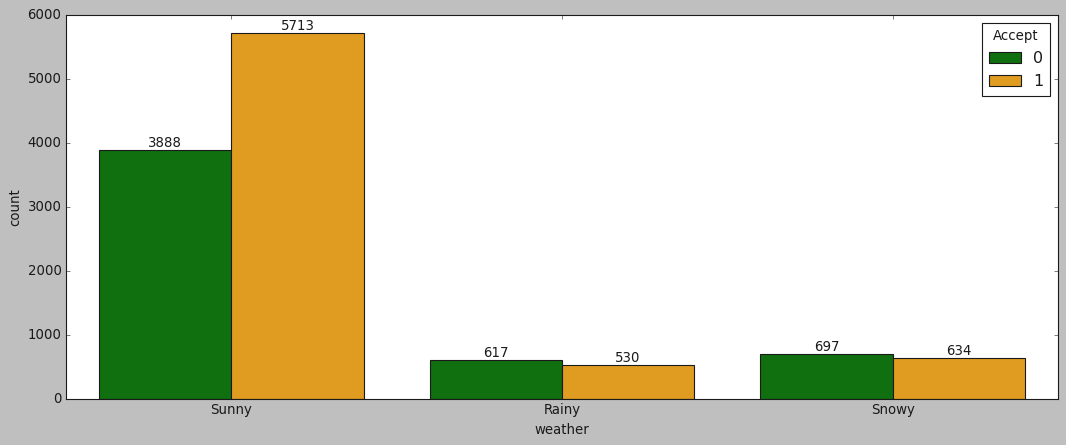

In [31]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="weather",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [32]:
univariate_analysis('temperature')

,temperature,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
2,80,6222,3731,2491,59.965,40.035
1,55,3662,1967,1695,53.714,46.286
0,30,2195,1179,1016,53.713,46.287


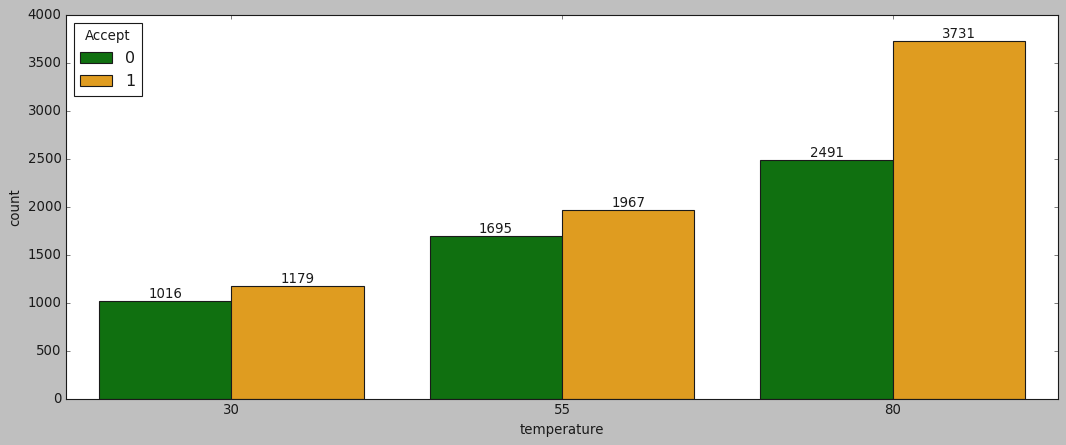

In [33]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="temperature",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [34]:
univariate_analysis('coupon')

,coupon,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
1,Carry out & Take away,2280,1682,598,73.772,26.228
4,Restaurant(<20),2653,1881,772,70.901,29.099
2,Coffee House,3816,1894,1922,49.633,50.367
3,Restaurant(20-50),1417,632,785,44.601,55.399
0,Bar,1913,788,1125,41.192,58.808


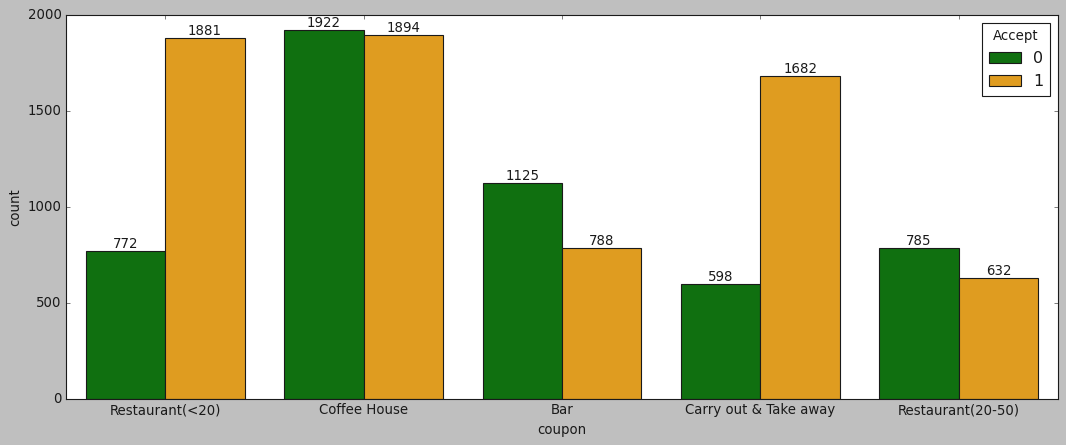

In [35]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="coupon",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [36]:
univariate_analysis('expiration')

,expiration,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
0,24h,6760,4244,2516,62.781,37.219
1,2h,5319,2633,2686,49.502,50.498


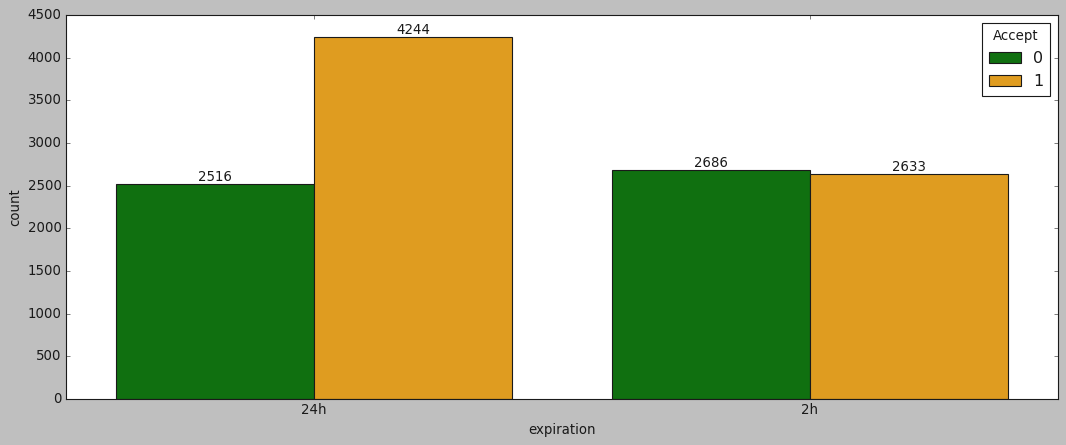

In [37]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="expiration",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [38]:
univariate_analysis('gender')

,gender,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
1,Male,5880,3483,2397,59.235,40.765
0,Female,6199,3394,2805,54.751,45.249


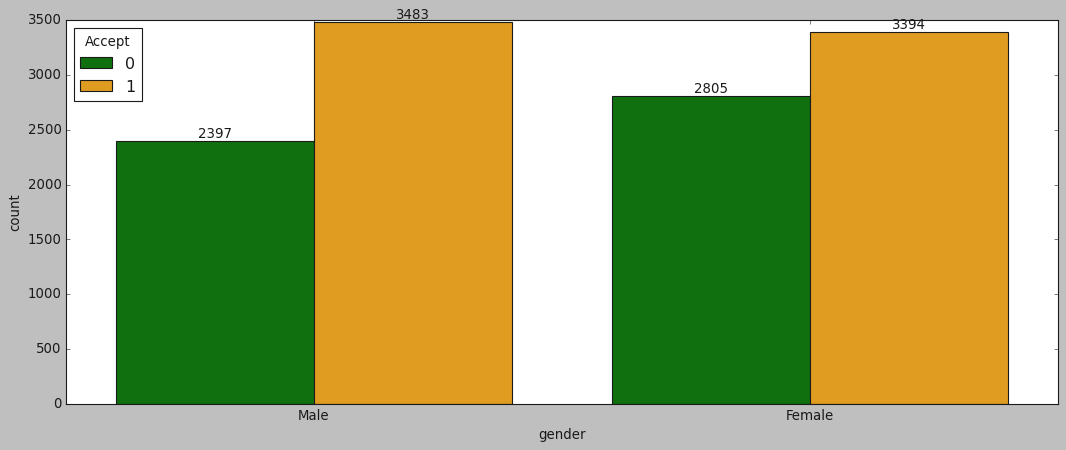

In [39]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="gender",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [40]:
univariate_analysis('age')

,age,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
7,below21,504,319,185,63.294,36.706
1,26,2399,1439,960,59.983,40.017
0,21,2537,1507,1030,59.401,40.599
5,46,664,383,281,57.681,42.319
4,41,1065,612,453,57.465,42.535
2,31,1925,1063,862,55.221,44.779
3,36,1253,675,578,53.871,46.129
6,50plus,1732,879,853,50.751,49.249


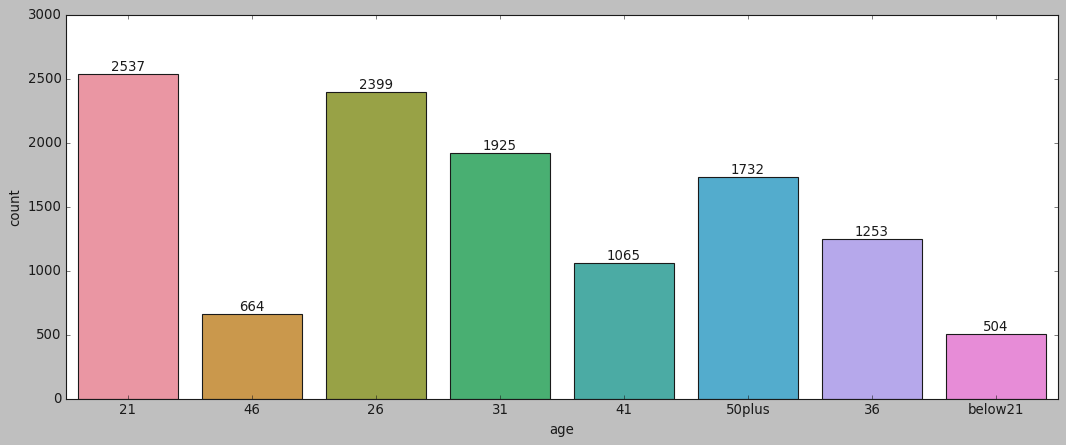

In [41]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="age",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

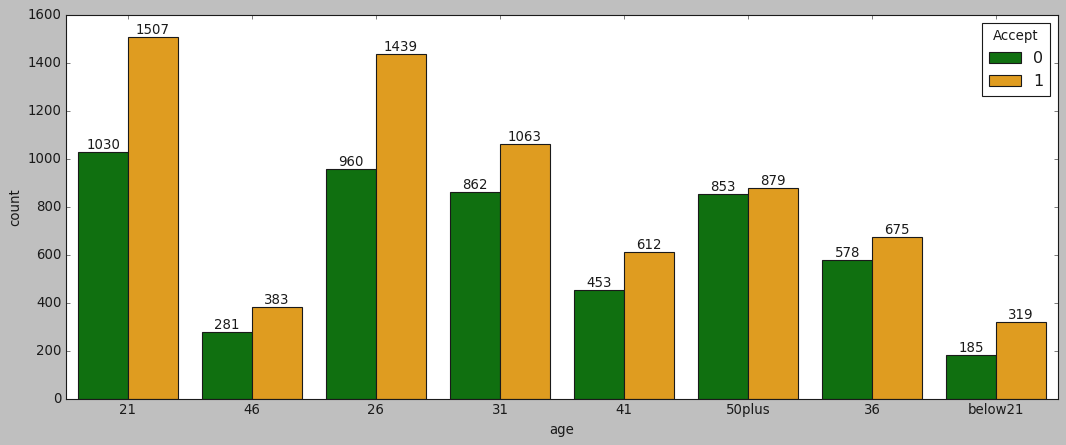

In [42]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="age",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [43]:
univariate_analysis('maritalStatus')

,maritalStatus,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
2,Single,4588,2800,1788,61.029,38.971
3,Unmarried partner,2048,1138,910,55.566,44.434
1,Married partner,4831,2623,2208,54.295,45.705
0,Divorced,504,265,239,52.579,47.421
4,Widowed,108,51,57,47.222,52.778


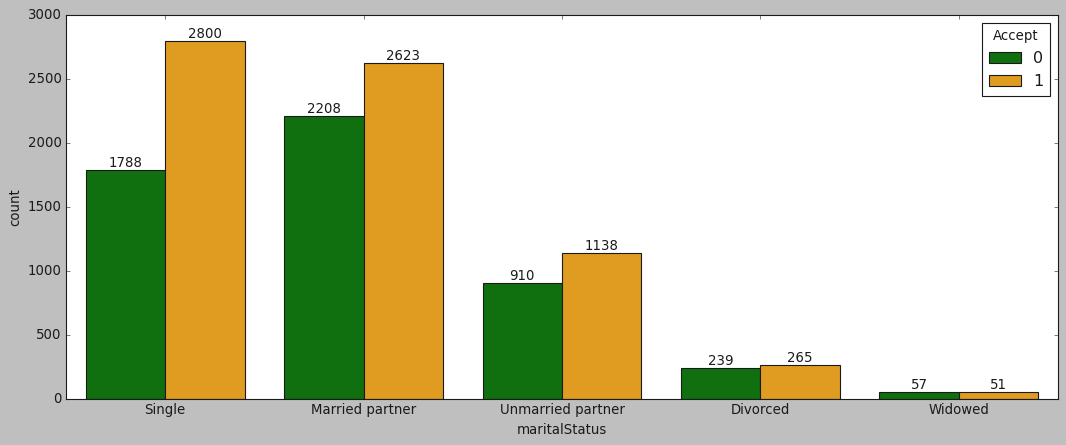

In [44]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="maritalStatus",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [45]:
univariate_analysis('has_children')

,has_children,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
0,0,7145,4210,2935,58.922,41.078
1,1,4934,2667,2267,54.054,45.946


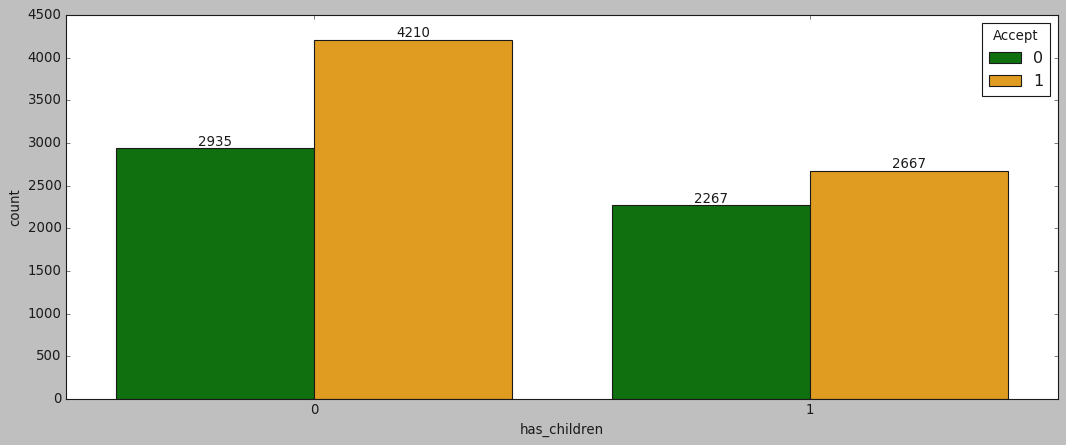

In [46]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="has_children",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [47]:
univariate_analysis('education')

,education,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
4,Some High School,88,63,25,71.591,28.409
5,Some college - no degree,4219,2508,1711,59.445,40.555
3,High School Graduate,877,521,356,59.407,40.593
0,Associates degree,1066,596,470,55.910,44.090
1,Bachelors degree,4021,2237,1784,55.633,44.367
2,Graduate degree (Masters or Doctorate),1808,952,856,52.655,47.345


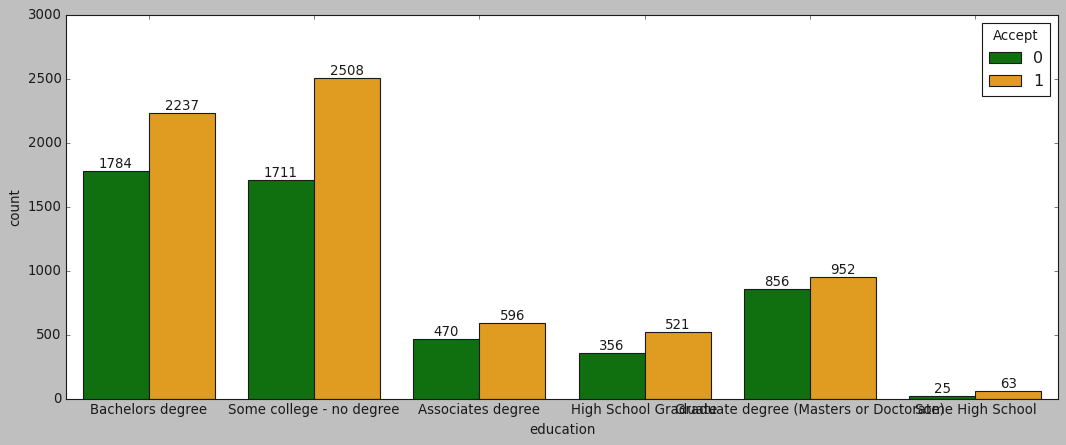

In [48]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="education",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [49]:
univariate_analysis('occupation')

,occupation,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
10,Healthcare Practitioners & Technical,222,159,63,71.622,28.378
18,Production Occupations,88,62,26,70.455,29.545
11,Healthcare Support,242,169,73,69.835,30.165
6,Construction & Extraction,154,106,48,68.831,31.169
19,Protective Service,175,113,62,64.571,35.429
0,Architecture & Engineering,175,111,64,63.429,36.571
22,Student,1497,911,586,60.855,39.145
16,Office & Administrative Support,617,372,245,60.292,39.708
23,Transportation & Material Moving,218,130,88,59.633,40.367
15,Management,772,458,314,59.326,40.674


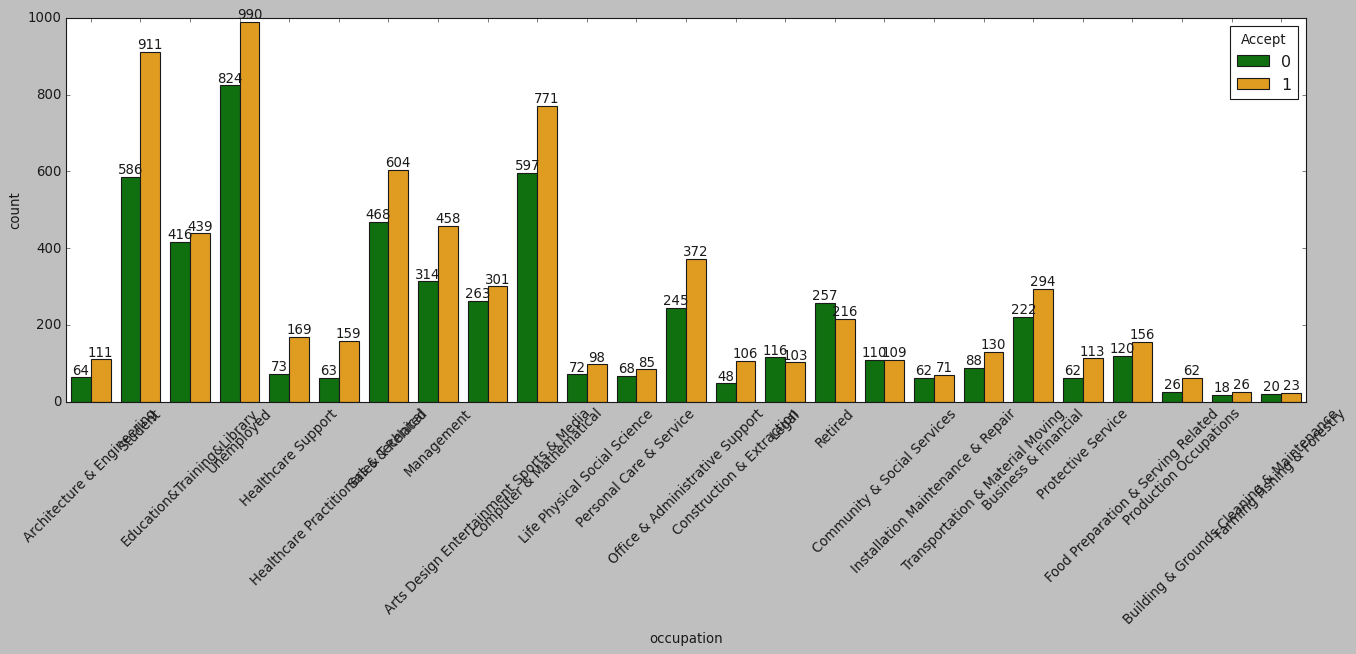

In [50]:
plt.figure(figsize=(20,6))
ax=sns.countplot(x="occupation",hue="Accept",data=data)
xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [51]:
univariate_analysis('income')

,income,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
2,$25000 - $37499,1919,1146,773,59.719,40.281
4,$50000 - $62499,1565,923,642,58.978,41.022
8,Less than $12500,1014,596,418,58.777,41.223
0,$100000 or More,1692,978,714,57.801,42.199
1,$12500 - $24999,1728,998,730,57.755,42.245
3,$37500 - $49999,1689,964,725,57.075,42.925
5,$62500 - $74999,840,443,397,52.738,47.262
7,$87500 - $99999,818,428,390,52.323,47.677
6,$75000 - $87499,814,401,413,49.263,50.737


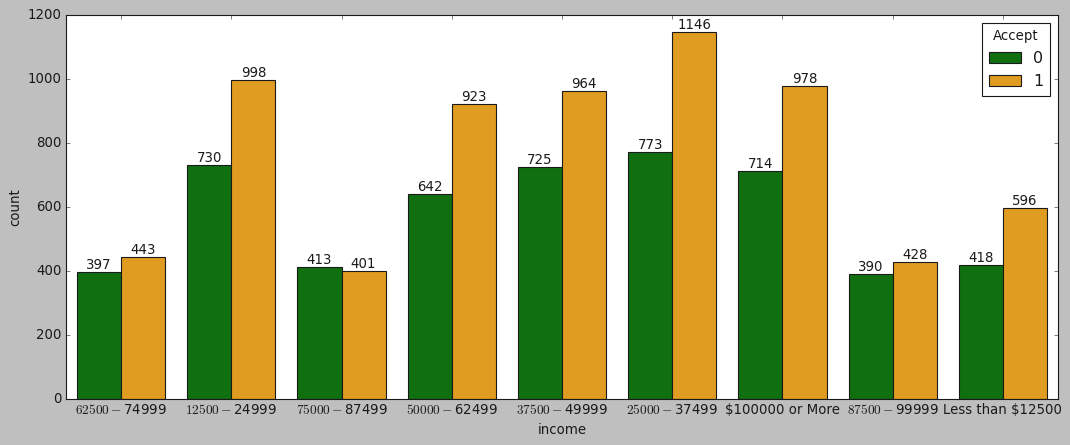

In [52]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="income",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [53]:
univariate_analysis('direction_opp')

,direction_opp,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
0,0,2599,1515,1084,58.292,41.708
1,1,9480,5362,4118,56.561,43.439


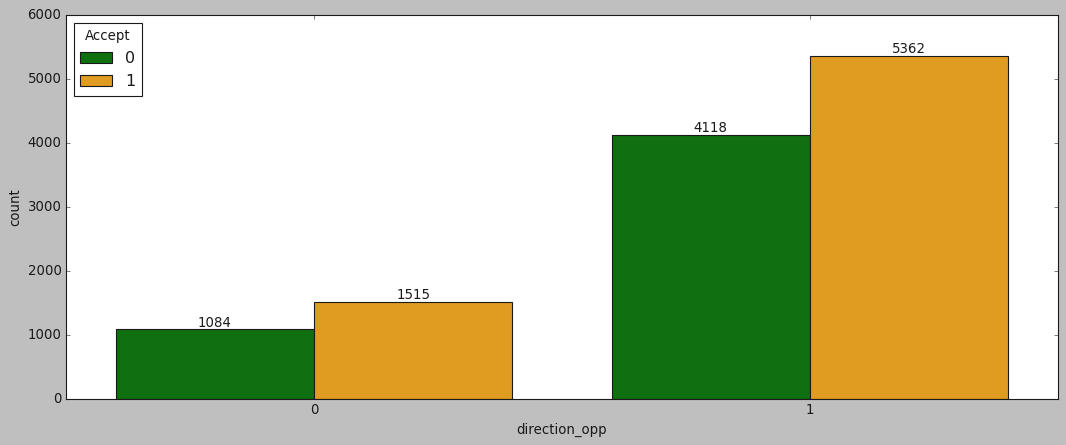

In [54]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="direction_opp",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [55]:
univariate_analysis('direction_same')

,direction_same,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
1,1,2599,1515,1084,58.292,41.708
0,0,9480,5362,4118,56.561,43.439


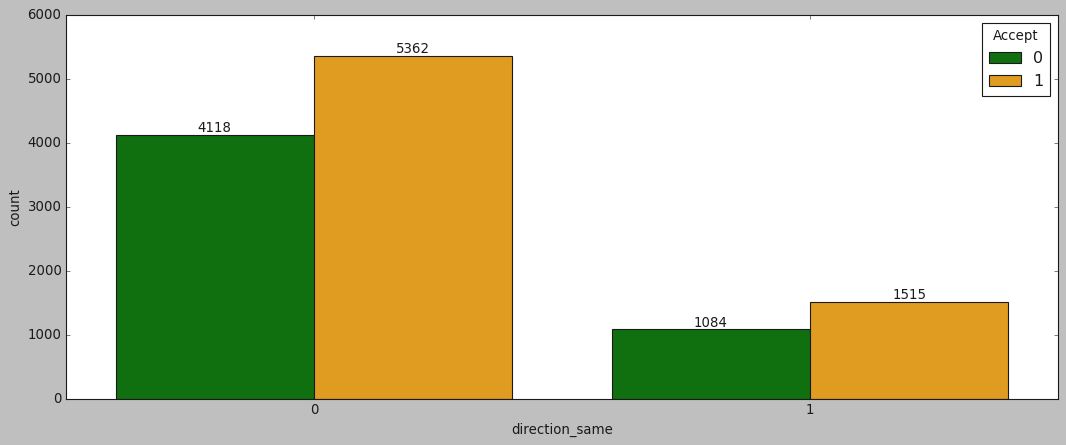

In [56]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="direction_same",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [57]:
univariate_analysis('toCoupon_GEQ25min')

,toCoupon_GEQ25min,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
0,0,10637,6251,4386,58.767,41.233
1,1,1442,626,816,43.412,56.588


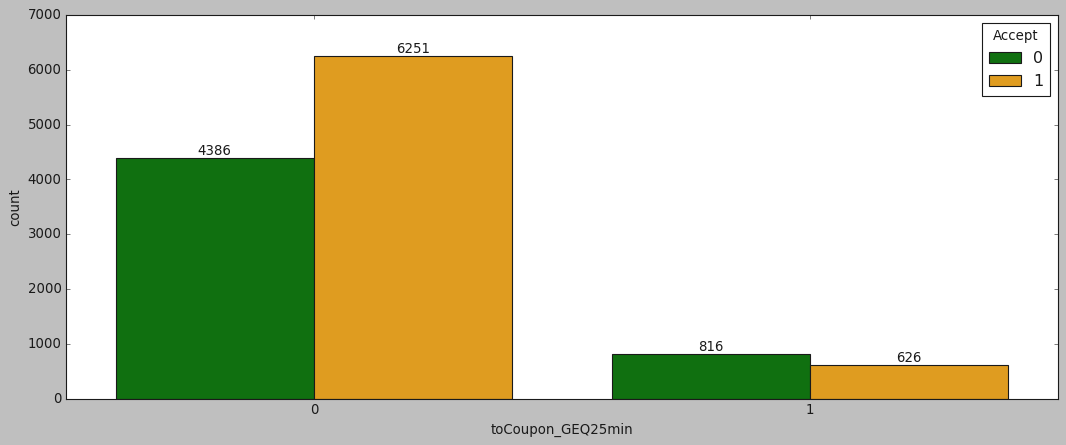

In [58]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="toCoupon_GEQ25min",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [59]:
univariate_analysis('toCoupon_GEQ15min')

,toCoupon_GEQ15min,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
0,0,5300,3260,2040,61.509,38.491
1,1,6779,3617,3162,53.356,46.644


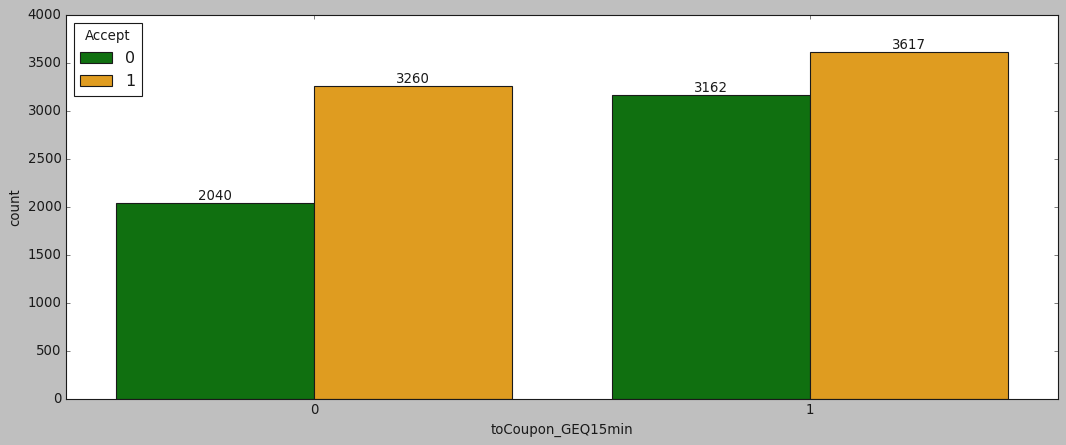

In [60]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="toCoupon_GEQ15min",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [61]:
univariate_analysis('toCoupon_GEQ5min')

,toCoupon_GEQ5min,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
0,1,12079,6877,5202,56.934,43.066


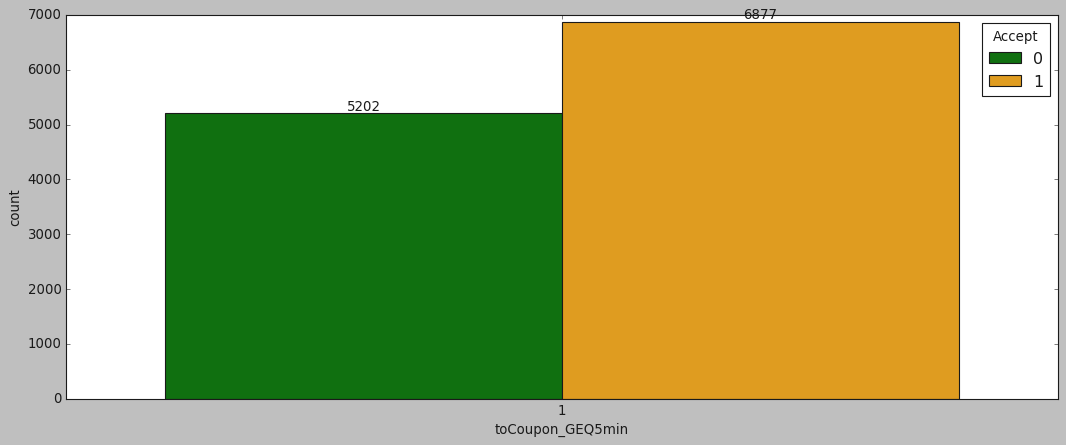

In [62]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="toCoupon_GEQ5min",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [63]:
univariate_analysis('Restaurant20To50')

,Restaurant20To50,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
2,Greater then 8,264,175,89,66.288,33.712
1,4 to 8,684,447,237,65.351,34.649
0,1 to 3,3202,1913,1289,59.744,40.256
3,less1,5859,3272,2587,55.846,44.154
4,never,2070,1070,1000,51.691,48.309


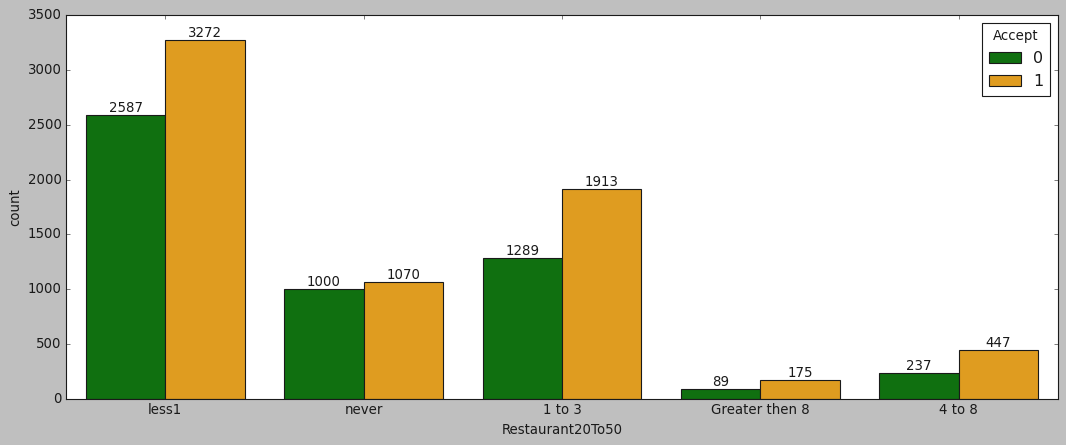

In [64]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="Restaurant20To50",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [65]:
univariate_analysis('RestaurantLessThan20')

,RestaurantLessThan20,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
2,Greater then 8,1285,781,504,60.778,39.222
4,never,176,103,73,58.523,41.477
1,4 to 8,3450,2012,1438,58.319,41.681
0,1 to 3,5163,2902,2261,56.208,43.792
3,less1,2005,1079,926,53.815,46.185


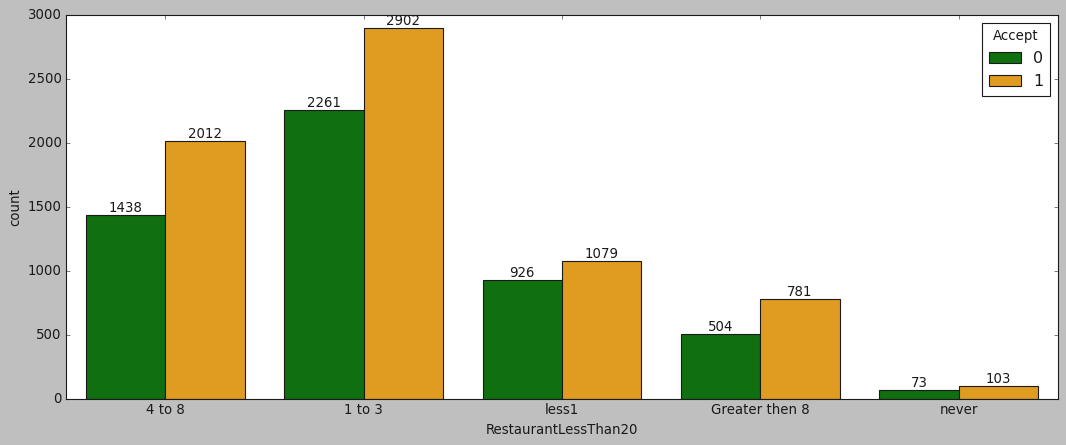

In [66]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="RestaurantLessThan20",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [67]:
univariate_analysis('CarryAway')

,CarryAway,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
0,1 to 3,4502,2623,1879,58.263,41.737
1,4 to 8,4083,2370,1713,58.046,41.954
2,Greater then 8,1573,913,660,58.042,41.958
4,never,131,72,59,54.962,45.038
3,less1,1790,899,891,50.223,49.777


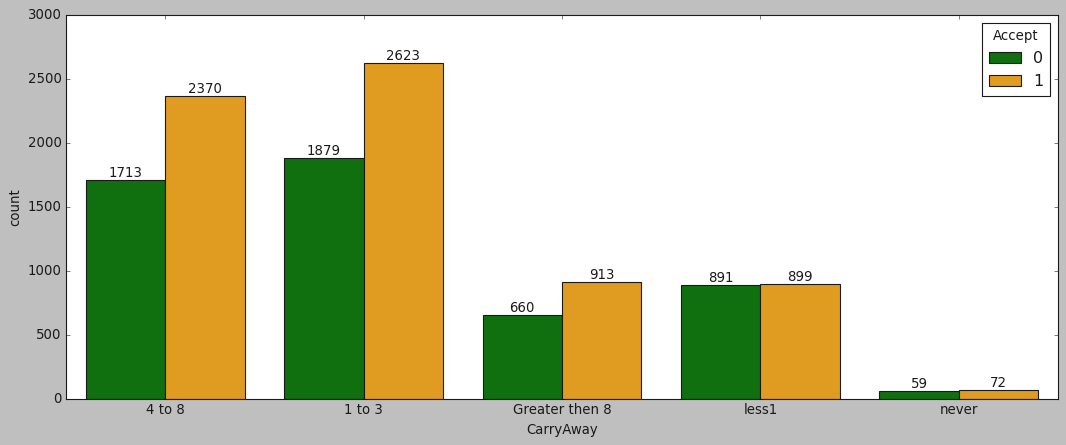

In [68]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="CarryAway",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [69]:
univariate_analysis('CoffeeHouse')

,CoffeeHouse,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
0,1 to 3,3159,2060,1099,65.211,34.789
1,4 to 8,1659,1047,612,63.110,36.890
2,Greater then 8,1111,648,463,58.326,41.674
3,less1,3298,1824,1474,55.306,44.694
4,never,2852,1298,1554,45.512,54.488


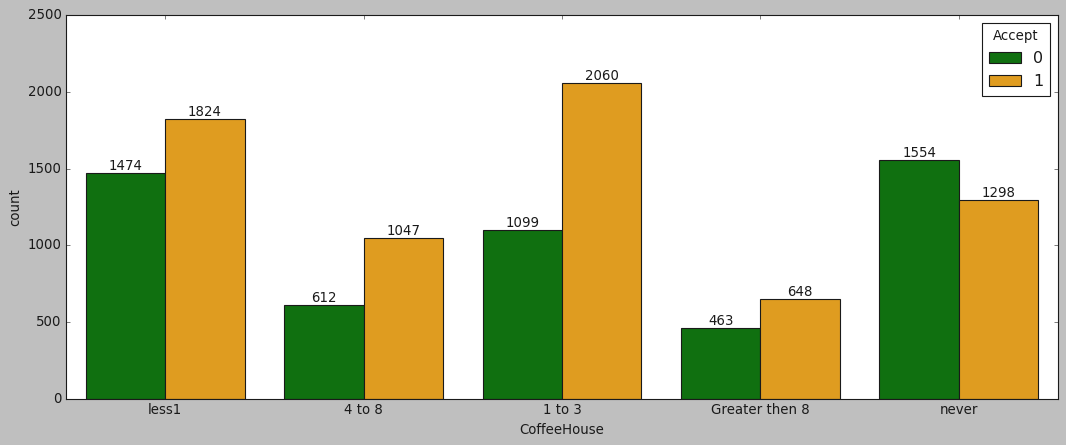

In [70]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="CoffeeHouse",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [71]:
univariate_analysis('Bar')

,Bar,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
1,4 to 8,1054,672,382,63.757,36.243
0,1 to 3,2370,1481,889,62.489,37.511
2,Greater then 8,327,186,141,56.881,43.119
3,less1,3394,1929,1465,56.836,43.164
4,never,4934,2609,2325,52.878,47.122


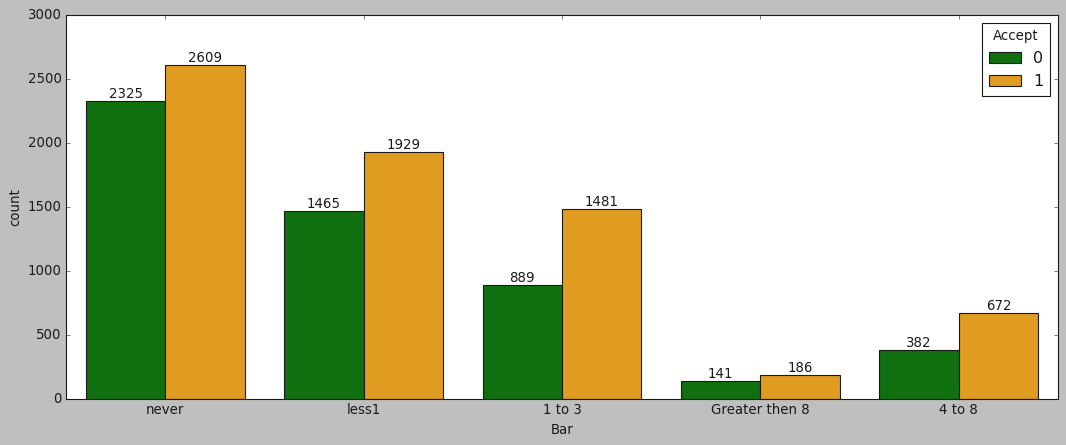

In [72]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x="Bar",hue="Accept",data=data)
xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [73]:
univariate_analysis('Bar')

,Bar,Total_Count,Accepted,Rejected,% Of Accepted,% Of Rejected
1,4 to 8,1054,672,382,63.757,36.243
0,1 to 3,2370,1481,889,62.489,37.511
2,Greater then 8,327,186,141,56.881,43.119
3,less1,3394,1929,1465,56.836,43.164
4,never,4934,2609,2325,52.878,47.122


In [74]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

In [75]:
def bivariate_analysis(col1,col2,c1,c2,no_row):
    a = list(data[col1].unique())
    b = list(data[col2].unique())
    df = pd.DataFrame([(i, j) for i in a for j in b], columns=[col1,col2])
    Total_Count=[]; Accepted=[]; Rejected=[]
    for i in range(df.shape[0]):
        Total_Count.append((data[(c1==df[col1][i]) & (c2==df[col2][i])]).shape[0])
        Accepted.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.Accept==1)]).shape[0])
        Rejected.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.Accept==0)]).shape[0])
    df['Total_Count'] = Total_Count
    df['Accepted'] = Accepted
    df['Rejected'] = Rejected
    df['%Accepted'] = round(df['Accepted']/df['Total_Count']*100,3)
    df['%Rejected'] = round(df['Rejected']/df['Total_Count']*100,3)
    df = df.dropna()
    df = df.sort_values(by='%Accepted', ascending=False)
    d = pd.concat([df.head(no_row), df.tail(no_row)], axis=0)
    return d

In [76]:
bivariate_analysis('destination', 'passanger', data.destination, data.passanger,4)

,destination,passanger,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,No Urgent Place,Friend(s),3148,2129,1019,67.630,32.370
0,No Urgent Place,Alone,1234,777,457,62.966,37.034
3,No Urgent Place,Partner,774,464,310,59.948,40.052
7,Home,Partner,250,145,105,58.000,42.000
2,No Urgent Place,Kid(s),814,415,399,50.983,49.017
4,Home,Alone,2711,1372,1339,50.609,49.391
8,Work,Alone,3024,1524,1500,50.397,49.603
6,Home,Kid(s),124,51,73,41.129,58.871


In [77]:
bivariate_analysis('destination', 'weather', data.destination, data.weather,4)

,destination,weather,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,Sunny,4986,3231,1755,64.801,35.199
2,No Urgent Place,Snowy,483,291,192,60.248,39.752
3,Home,Sunny,2458,1344,1114,54.679,45.321
6,Work,Sunny,2157,1138,1019,52.758,47.242
8,Work,Snowy,464,226,238,48.707,51.293
4,Home,Rainy,243,107,136,44.033,55.967
7,Work,Rainy,403,160,243,39.702,60.298
5,Home,Snowy,384,117,267,30.469,69.531


In [78]:
bivariate_analysis('destination', 'temperature', data.destination, data.temperature,4)

,destination,temperature,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,55,1629,1035,594,63.536,36.464
1,No Urgent Place,80,3479,2208,1271,63.467,36.533
2,No Urgent Place,30,862,542,320,62.877,37.123
7,Work,80,1198,715,483,59.683,40.317
5,Home,30,739,367,372,49.662,50.338
3,Home,55,801,393,408,49.064,50.936
8,Work,30,594,270,324,45.455,54.545
6,Work,55,1232,539,693,43.750,56.250


In [79]:
bivariate_analysis('destination', 'coupon', data.destination, data.coupon,4)

,destination,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,Restaurant(<20),1628,1293,335,79.423,20.577
8,Home,Carry out & Take away,620,491,129,79.194,20.806
3,No Urgent Place,Carry out & Take away,931,709,222,76.155,23.845
13,Work,Carry out & Take away,729,482,247,66.118,33.882
2,No Urgent Place,Bar,969,400,569,41.280,58.720
14,Work,Restaurant(20-50),410,165,245,40.244,59.756
12,Work,Bar,462,170,292,36.797,63.203
6,Home,Coffee House,888,322,566,36.261,63.739


In [80]:
bivariate_analysis('destination', 'expiration', data.destination, data.expiration,4)

,destination,expiration,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,24h,3166,2133,1033,67.372,32.628
1,No Urgent Place,2h,2804,1652,1152,58.916,41.084
2,Home,24h,1746,1028,718,58.877,41.123
4,Work,24h,1848,1083,765,58.604,41.396
2,Home,24h,1746,1028,718,58.877,41.123
4,Work,24h,1848,1083,765,58.604,41.396
3,Home,2h,1339,540,799,40.329,59.671
5,Work,2h,1176,441,735,37.500,62.500


In [81]:
bivariate_analysis('destination', 'gender', data.destination, data.gender,4)

,destination,gender,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,Male,2920,1892,1028,64.795,35.205
1,No Urgent Place,Female,3050,1893,1157,62.066,37.934
2,Home,Male,1479,806,673,54.496,45.504
4,Work,Male,1481,785,696,53.005,46.995
2,Home,Male,1479,806,673,54.496,45.504
4,Work,Male,1481,785,696,53.005,46.995
5,Work,Female,1543,739,804,47.894,52.106
3,Home,Female,1606,762,844,47.447,52.553


In [82]:
bivariate_analysis('destination', 'age', data.destination, data.age,4)

,destination,age,Total_Count,Accepted,Rejected,%Accepted,%Rejected
7,No Urgent Place,below21,228,158,70,69.298,30.702
2,No Urgent Place,26,1175,796,379,67.745,32.255
0,No Urgent Place,21,1214,817,397,67.298,32.702
1,No Urgent Place,46,350,235,115,67.143,32.857
19,Work,31,466,222,244,47.639,52.361
14,Home,36,319,150,169,47.022,52.978
17,Work,46,166,76,90,45.783,54.217
13,Home,50plus,433,197,236,45.497,54.503


In [83]:
bivariate_analysis('destination', 'maritalStatus', data.destination, data.maritalStatus,4)

,destination,maritalStatus,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,Single,2144,1488,656,69.403,30.597
2,No Urgent Place,Unmarried partner,1034,634,400,61.315,38.685
3,No Urgent Place,Divorced,224,137,87,61.161,38.839
1,No Urgent Place,Married partner,2512,1500,1012,59.713,40.287
8,Home,Divorced,138,66,72,47.826,52.174
6,Home,Married partner,1203,574,629,47.714,52.286
4,No Urgent Place,Widowed,56,26,30,46.429,53.571
13,Work,Divorced,142,62,80,43.662,56.338


In [84]:
bivariate_analysis('destination', 'has_children', data.destination, data.has_children,4)

,destination,has_children,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,0,3455,2305,1150,66.715,33.285
1,No Urgent Place,1,2515,1480,1035,58.847,41.153
2,Home,0,1850,968,882,52.324,47.676
4,Work,0,1840,937,903,50.924,49.076
2,Home,0,1850,968,882,52.324,47.676
4,Work,0,1840,937,903,50.924,49.076
5,Work,1,1184,587,597,49.578,50.422
3,Home,1,1235,600,635,48.583,51.417


In [85]:
bivariate_analysis('destination', 'education', data.destination, data.education,4)

,destination,education,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,No Urgent Place,Some High School,38,31,7,81.579,18.421
17,Work,Some High School,23,16,7,69.565,30.435
3,No Urgent Place,High School Graduate,389,268,121,68.895,31.105
1,No Urgent Place,Some college - no degree,2123,1404,719,66.133,33.867
8,Home,Associates degree,278,137,141,49.281,50.719
15,Work,High School Graduate,238,115,123,48.319,51.681
10,Home,Graduate degree (Masters or Doctorate),473,221,252,46.723,53.277
16,Work,Graduate degree (Masters or Doctorate),442,206,236,46.606,53.394


In [86]:
bivariate_analysis('destination', 'occupation', data.destination, data.occupation,4)

,destination,occupation,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,No Urgent Place,Healthcare Practitioners & Technical,125,95,30,76.000,24.000
22,No Urgent Place,Production Occupations,33,25,8,75.758,24.242
55,Work,Healthcare Practitioners & Technical,49,36,13,73.469,26.531
4,No Urgent Place,Healthcare Support,120,87,33,72.500,27.500
35,Home,Life Physical Social Science,32,13,19,40.625,59.375
73,Work,Building & Grounds Cleaning & Maintenance,8,3,5,37.500,62.500
64,Work,Legal,57,20,37,35.088,64.912
40,Home,Retired,110,36,74,32.727,67.273


In [87]:
bivariate_analysis('destination', 'income', data.destination, data.income,4)

,destination,income,Total_Count,Accepted,Rejected,%Accepted,%Rejected
8,No Urgent Place,Less than $12500,444,298,146,67.117,32.883
3,No Urgent Place,$50000 - $62499,807,531,276,65.799,34.201
6,No Urgent Place,$100000 or More,850,558,292,65.647,34.353
1,No Urgent Place,$12500 - $24999,850,554,296,65.176,34.824
25,Work,$87500 - $99999,191,86,105,45.026,54.974
18,Work,$62500 - $74999,206,92,114,44.660,55.340
9,Home,$62500 - $74999,218,96,122,44.037,55.963
11,Home,$75000 - $87499,208,91,117,43.750,56.250


In [88]:
bivariate_analysis('destination', 'Bar', data.destination, data.Bar,4)

,destination,Bar,Total_Count,Accepted,Rejected,%Accepted,%Rejected
4,No Urgent Place,4 to 8,514,356,158,69.261,30.739
2,No Urgent Place,1 to 3,1178,813,365,69.015,30.985
1,No Urgent Place,less1,1651,1072,579,64.930,35.070
3,No Urgent Place,Greater then 8,169,102,67,60.355,39.645
8,Home,Greater then 8,73,36,37,49.315,50.685
11,Work,less1,846,408,438,48.227,51.773
10,Work,never,1225,581,644,47.429,52.571
5,Home,never,1251,586,665,46.843,53.157


In [89]:
bivariate_analysis('destination', 'CoffeeHouse', data.destination, data.CoffeeHouse,4)

,destination,CoffeeHouse,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,No Urgent Place,1 to 3,1611,1183,428,73.433,26.567
1,No Urgent Place,4 to 8,794,533,261,67.128,32.872
3,No Urgent Place,Greater then 8,534,340,194,63.670,36.330
0,No Urgent Place,less1,1657,1050,607,63.368,36.632
10,Work,less1,821,390,431,47.503,52.497
5,Home,less1,820,384,436,46.829,53.171
14,Work,never,716,301,415,42.039,57.961
9,Home,never,762,318,444,41.732,58.268


In [90]:
bivariate_analysis('destination', 'CarryAway', data.destination, data.CarryAway,4)

,destination,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,No Urgent Place,1 to 3,2253,1471,782,65.291,34.709
2,No Urgent Place,Greater then 8,792,511,281,64.520,35.480
0,No Urgent Place,4 to 8,1993,1262,731,63.322,36.678
9,Home,never,36,21,15,58.333,41.667
11,Work,1 to 3,1133,561,572,49.515,50.485
14,Work,never,31,15,16,48.387,51.613
13,Work,less1,445,200,245,44.944,55.056
8,Home,less1,477,194,283,40.671,59.329


In [91]:
bivariate_analysis('destination', 'Accept', data.destination, data.Accept,4)

,destination,Accept,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,1,3785,3785,0,100.0,0.0
2,Home,1,1568,1568,0,100.0,0.0
4,Work,1,1524,1524,0,100.0,0.0
1,No Urgent Place,0,2185,0,2185,0.0,100.0
4,Work,1,1524,1524,0,100.0,0.0
1,No Urgent Place,0,2185,0,2185,0.0,100.0
3,Home,0,1517,0,1517,0.0,100.0
5,Work,0,1500,0,1500,0.0,100.0


In [92]:
bivariate_analysis('destination', 'direction_opp', data.destination, data.direction_opp,4)

,destination,direction_opp,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,1,5970,3785,2185,63.400,36.600
3,Home,0,1455,870,585,59.794,40.206
5,Work,0,1144,645,499,56.381,43.619
4,Work,1,1880,879,1001,46.755,53.245
3,Home,0,1455,870,585,59.794,40.206
5,Work,0,1144,645,499,56.381,43.619
4,Work,1,1880,879,1001,46.755,53.245
2,Home,1,1630,698,932,42.822,57.178


In [93]:
bivariate_analysis('destination', 'direction_same', data.destination, data.direction_same,4)

,destination,direction_same,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,0,5970,3785,2185,63.400,36.600
3,Home,1,1455,870,585,59.794,40.206
5,Work,1,1144,645,499,56.381,43.619
4,Work,0,1880,879,1001,46.755,53.245
3,Home,1,1455,870,585,59.794,40.206
5,Work,1,1144,645,499,56.381,43.619
4,Work,0,1880,879,1001,46.755,53.245
2,Home,0,1630,698,932,42.822,57.178


In [94]:
bivariate_analysis('destination', 'toCoupon_GEQ5min', data.destination, data.toCoupon_GEQ5min,4)

,destination,toCoupon_GEQ5min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,1,5970,3785,2185,63.400,36.600
1,Home,1,3085,1568,1517,50.827,49.173
2,Work,1,3024,1524,1500,50.397,49.603
0,No Urgent Place,1,5970,3785,2185,63.400,36.600
1,Home,1,3085,1568,1517,50.827,49.173
2,Work,1,3024,1524,1500,50.397,49.603


In [95]:
bivariate_analysis('destination', 'Restaurant20To50', data.destination, data.Restaurant20To50,4)

,destination,Restaurant20To50,Total_Count,Accepted,Rejected,%Accepted,%Rejected
3,No Urgent Place,Greater then 8,137,95,42,69.343,30.657
4,No Urgent Place,4 to 8,337,233,104,69.139,30.861
13,Work,Greater then 8,67,45,22,67.164,32.836
2,No Urgent Place,1 to 3,1602,1073,529,66.979,33.021
5,Home,less1,1485,740,745,49.832,50.168
10,Work,less1,1454,723,731,49.725,50.275
11,Work,never,543,248,295,45.672,54.328
6,Home,never,553,247,306,44.665,55.335


In [96]:
bivariate_analysis('destination', 'RestaurantLessThan20', data.destination, data.RestaurantLessThan20,4)

,destination,RestaurantLessThan20,Total_Count,Accepted,Rejected,%Accepted,%Rejected
4,No Urgent Place,never,84,57,27,67.857,32.143
3,No Urgent Place,Greater then 8,660,432,228,65.455,34.545
0,No Urgent Place,4 to 8,1730,1128,602,65.202,34.798
1,No Urgent Place,1 to 3,2518,1587,931,63.026,36.974
7,Home,less1,519,256,263,49.326,50.674
11,Work,1 to 3,1300,638,662,49.077,50.923
12,Work,less1,508,242,266,47.638,52.362
9,Home,never,47,22,25,46.809,53.191


In [97]:
bivariate_analysis('passanger', 'weather', data.passanger, data.weather,4)

,passanger,weather,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,Friend(s),Snowy,246,188,58,76.423,23.577
3,Friend(s),Sunny,2764,1875,889,67.836,32.164
9,Partner,Sunny,816,493,323,60.417,39.583
11,Partner,Snowy,60,34,26,56.667,43.333
4,Friend(s),Rainy,138,66,72,47.826,52.174
1,Alone,Rainy,787,343,444,43.583,56.417
2,Alone,Snowy,963,398,565,41.329,58.671
8,Kid(s),Snowy,62,14,48,22.581,77.419


In [98]:
bivariate_analysis('passanger', 'coupon', data.passanger, data.coupon,4)

,passanger,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,Friend(s),Restaurant(<20),789,634,155,80.355,19.645
15,Partner,Restaurant(<20),245,192,53,78.367,21.633
8,Friend(s),Carry out & Take away,707,537,170,75.955,24.045
3,Alone,Carry out & Take away,1339,980,359,73.189,26.811
2,Alone,Bar,1141,467,674,40.929,59.071
17,Partner,Bar,260,101,159,38.846,61.154
14,Kid(s),Restaurant(20-50),160,59,101,36.875,63.125
12,Kid(s),Bar,194,40,154,20.619,79.381


In [99]:
bivariate_analysis('passanger', 'expiration', data.passanger, data.expiration,4)

,passanger,expiration,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,Friend(s),24h,1493,1102,391,73.811,26.189
6,Partner,24h,539,346,193,64.193,35.807
3,Friend(s),2h,1655,1027,628,62.054,37.946
0,Alone,24h,4221,2530,1691,59.938,40.062
7,Partner,2h,485,263,222,54.227,45.773
4,Kid(s),24h,507,266,241,52.465,47.535
5,Kid(s),2h,431,200,231,46.404,53.596
1,Alone,2h,2748,1143,1605,41.594,58.406


In [100]:
bivariate_analysis('passanger', 'gender', data.passanger, data.gender,4)

,passanger,gender,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,Friend(s),Male,1586,1079,507,68.033,31.967
3,Friend(s),Female,1562,1050,512,67.222,32.778
7,Partner,Female,533,318,215,59.662,40.338
6,Partner,Male,491,291,200,59.267,40.733
0,Alone,Male,3429,1919,1510,55.964,44.036
4,Kid(s),Male,374,194,180,51.872,48.128
1,Alone,Female,3540,1754,1786,49.548,50.452
5,Kid(s),Female,564,272,292,48.227,51.773


In [101]:
bivariate_analysis('passanger', 'age', data.passanger, data.age,4)

,passanger,age,Total_Count,Accepted,Rejected,%Accepted,%Rejected
25,Partner,46,38,29,9,76.316,23.684
28,Partner,41,66,50,16,75.758,24.242
10,Friend(s),26,646,472,174,73.065,26.935
15,Friend(s),below21,123,88,35,71.545,28.455
20,Kid(s),41,164,76,88,46.341,53.659
21,Kid(s),50plus,152,70,82,46.053,53.947
29,Partner,50plus,132,59,73,44.697,55.303
19,Kid(s),31,203,85,118,41.872,58.128


In [102]:
bivariate_analysis('passanger', 'maritalStatus', data.passanger, data.maritalStatus,4)

,passanger,maritalStatus,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,Friend(s),Single,1477,1033,444,69.939,30.061
8,Friend(s),Divorced,122,83,39,68.033,31.967
18,Partner,Divorced,6,4,2,66.667,33.333
7,Friend(s),Unmarried partner,448,295,153,65.848,34.152
12,Kid(s),Unmarried partner,77,37,40,48.052,51.948
3,Alone,Divorced,341,161,180,47.214,52.786
4,Alone,Widowed,63,29,34,46.032,53.968
19,Partner,Widowed,6,2,4,33.333,66.667


In [103]:
bivariate_analysis('passanger', 'has_children', data.passanger, data.has_children,4)

,passanger,has_children,Total_Count,Accepted,Rejected,%Accepted,%Rejected
4,Kid(s),0,17,12,5,70.588,29.412
2,Friend(s),0,1987,1375,612,69.200,30.800
3,Friend(s),1,1161,754,407,64.944,35.056
6,Partner,0,851,514,337,60.400,39.600
7,Partner,1,173,95,78,54.913,45.087
0,Alone,0,4290,2309,1981,53.823,46.177
1,Alone,1,2679,1364,1315,50.915,49.085
5,Kid(s),1,921,454,467,49.294,50.706


In [104]:
bivariate_analysis('passanger', 'education', data.passanger, data.education,4)

,passanger,education,Total_Count,Accepted,Rejected,%Accepted,%Rejected
23,Partner,Some High School,6,5,1,83.333,16.667
11,Friend(s),Some High School,17,14,3,82.353,17.647
9,Friend(s),High School Graduate,224,167,57,74.554,25.446
7,Friend(s),Some college - no degree,1129,783,346,69.353,30.647
16,Kid(s),Graduate degree (Masters or Doctorate),202,100,102,49.505,50.495
14,Kid(s),Associates degree,96,47,49,48.958,51.042
4,Alone,Graduate degree (Masters or Doctorate),1028,496,532,48.249,51.751
12,Kid(s),Bachelors degree,333,152,181,45.646,54.354


In [105]:
bivariate_analysis('passanger', 'occupation', data.passanger, data.occupation,4)

,passanger,occupation,Total_Count,Accepted,Rejected,%Accepted,%Rejected
99,Partner,Farming Fishing & Forestry,1,1,0,100.000,0.000
30,Friend(s),Healthcare Practitioners & Technical,66,58,8,87.879,12.121
98,Partner,Building & Grounds Cleaning & Maintenance,7,6,1,85.714,14.286
88,Partner,Construction & Extraction,19,16,3,84.211,15.789
58,Kid(s),Arts Design Entertainment Sports & Media,62,20,42,32.258,67.742
67,Kid(s),Installation Maintenance & Repair,5,1,4,20.000,80.000
92,Partner,Installation Maintenance & Repair,2,0,2,0.000,100.000
64,Kid(s),Legal,6,0,6,0.000,100.000


In [106]:
bivariate_analysis('passanger', 'income', data.passanger, data.income,4)

,passanger,income,Total_Count,Accepted,Rejected,%Accepted,%Rejected
17,Friend(s),Less than $12500,256,185,71,72.266,27.734
14,Friend(s),$25000 - $37499,514,362,152,70.428,29.572
12,Friend(s),$50000 - $62499,414,288,126,69.565,30.435
10,Friend(s),$12500 - $24999,478,325,153,67.992,32.008
20,Kid(s),$75000 - $87499,78,36,42,46.154,53.846
0,Alone,$62500 - $74999,473,218,255,46.089,53.911
2,Alone,$75000 - $87499,447,203,244,45.414,54.586
26,Kid(s),Less than $12500,16,6,10,37.500,62.500


In [107]:
bivariate_analysis('passanger', 'temperature', data.passanger, data.temperature,4)

,passanger,temperature,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,Friend(s),30,508,375,133,73.819,26.181
3,Friend(s),55,660,441,219,66.818,33.182
4,Friend(s),80,1980,1313,667,66.313,33.687
10,Partner,80,572,361,211,63.112,36.888
0,Alone,55,2451,1245,1206,50.796,49.204
9,Partner,55,201,101,100,50.249,49.751
2,Alone,30,1327,629,698,47.400,52.600
8,Kid(s),30,109,28,81,25.688,74.312


In [108]:
bivariate_analysis('passanger', 'toCoupon_GEQ25min', data.passanger, data.toCoupon_GEQ25min,4)

,passanger,toCoupon_GEQ25min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,Kid(s),1,5,4,1,80.000,20.000
2,Friend(s),0,3148,2129,1019,67.630,32.370
6,Partner,0,947,569,378,60.084,39.916
0,Alone,0,5609,3091,2518,55.108,44.892
0,Alone,0,5609,3091,2518,55.108,44.892
7,Partner,1,77,40,37,51.948,48.052
4,Kid(s),0,933,462,471,49.518,50.482
1,Alone,1,1360,582,778,42.794,57.206


In [109]:
bivariate_analysis('passanger', 'direction_same', data.passanger, data.direction_same,4)

,passanger,direction_same,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,Friend(s),0,3148,2129,1019,67.630,32.370
7,Partner,1,133,80,53,60.150,39.850
6,Partner,0,891,529,362,59.371,40.629
1,Alone,1,2420,1411,1009,58.306,41.694
1,Alone,1,2420,1411,1009,58.306,41.694
5,Kid(s),1,46,24,22,52.174,47.826
0,Alone,0,4549,2262,2287,49.725,50.275
4,Kid(s),0,892,442,450,49.552,50.448


In [110]:
bivariate_analysis('passanger', 'RestaurantLessThan20', data.passanger, data.RestaurantLessThan20,4)

,passanger,RestaurantLessThan20,Total_Count,Accepted,Rejected,%Accepted,%Rejected
9,Friend(s),never,47,36,11,76.596,23.404
8,Friend(s),Greater then 8,360,256,104,71.111,28.889
5,Friend(s),4 to 8,874,597,277,68.307,31.693
6,Friend(s),1 to 3,1326,896,430,67.572,32.428
19,Partner,never,12,6,6,50.000,50.000
11,Kid(s),1 to 3,424,199,225,46.934,53.066
13,Kid(s),Greater then 8,96,45,51,46.875,53.125
12,Kid(s),less1,175,78,97,44.571,55.429


In [111]:
bivariate_analysis('passanger', 'Restaurant20To50', data.passanger, data.Restaurant20To50,4)

,passanger,Restaurant20To50,Total_Count,Accepted,Rejected,%Accepted,%Rejected
9,Friend(s),4 to 8,171,124,47,72.515,27.485
19,Partner,4 to 8,47,34,13,72.340,27.660
7,Friend(s),1 to 3,806,578,228,71.712,28.288
8,Friend(s),Greater then 8,91,63,28,69.231,30.769
14,Kid(s),4 to 8,60,31,29,51.667,48.333
16,Partner,never,143,72,71,50.350,49.650
1,Alone,never,1259,583,676,46.307,53.693
10,Kid(s),less1,489,222,267,45.399,54.601


In [112]:
bivariate_analysis('passanger', 'toCoupon_GEQ5min', data.passanger, data.toCoupon_GEQ5min,4)

,passanger,toCoupon_GEQ5min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,Friend(s),1,3148,2129,1019,67.630,32.370
3,Partner,1,1024,609,415,59.473,40.527
0,Alone,1,6969,3673,3296,52.705,47.295
2,Kid(s),1,938,466,472,49.680,50.320
1,Friend(s),1,3148,2129,1019,67.630,32.370
3,Partner,1,1024,609,415,59.473,40.527
0,Alone,1,6969,3673,3296,52.705,47.295
2,Kid(s),1,938,466,472,49.680,50.320


In [113]:
bivariate_analysis('passanger', 'CarryAway', data.passanger, data.CarryAway,4)

,passanger,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
6,Friend(s),1 to 3,1193,835,358,69.992,30.008
5,Friend(s),4 to 8,1035,707,328,68.309,31.691
7,Friend(s),Greater then 8,448,293,155,65.402,34.598
17,Partner,Greater then 8,147,95,52,64.626,35.374
12,Kid(s),Greater then 8,66,31,35,46.970,53.030
3,Alone,less1,1057,487,570,46.074,53.926
13,Kid(s),less1,152,58,94,38.158,61.842
14,Kid(s),never,9,3,6,33.333,66.667


In [114]:
bivariate_analysis('passanger', 'CoffeeHouse', data.passanger, data.CoffeeHouse,4)

,passanger,CoffeeHouse,Total_Count,Accepted,Rejected,%Accepted,%Rejected
7,Friend(s),1 to 3,849,669,180,78.799,21.201
18,Partner,Greater then 8,53,39,14,73.585,26.415
17,Partner,1 to 3,286,197,89,68.881,31.119
6,Friend(s),4 to 8,435,298,137,68.506,31.494
19,Partner,never,241,115,126,47.718,52.282
10,Kid(s),less1,235,110,125,46.809,53.191
4,Alone,never,1683,712,971,42.305,57.695
14,Kid(s),never,204,78,126,38.235,61.765


In [115]:
bivariate_analysis('passanger', 'Bar', data.passanger, data.Bar,4)

,passanger,Bar,Total_Count,Accepted,Rejected,%Accepted,%Rejected
13,Kid(s),Greater then 8,6,5,1,83.333,16.667
18,Partner,Greater then 8,12,9,3,75.000,25.000
7,Friend(s),1 to 3,624,454,170,72.756,27.244
9,Friend(s),4 to 8,314,222,92,70.701,29.299
1,Alone,less1,1951,1001,950,51.307,48.693
11,Kid(s),less1,264,131,133,49.621,50.379
0,Alone,never,2818,1389,1429,49.290,50.710
10,Kid(s),never,483,221,262,45.756,54.244


In [121]:
bivariate_analysis('weather', 'temperature', data.weather, data.temperature,4)

,weather,temperature,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,Sunny,30,864,545,319,63.079,36.921
1,Sunny,80,6222,3731,2491,59.965,40.035
0,Sunny,55,2515,1437,1078,57.137,42.863
8,Snowy,30,1331,634,697,47.633,52.367
1,Sunny,80,6222,3731,2491,59.965,40.035
0,Sunny,55,2515,1437,1078,57.137,42.863
8,Snowy,30,1331,634,697,47.633,52.367
3,Rainy,55,1147,530,617,46.207,53.793


In [129]:
bivariate_analysis('weather', 'gender', data.weather, data.gender,4)

,weather,gender,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,Sunny,Male,4600,2830,1770,61.522,38.478
1,Sunny,Female,5001,2883,2118,57.648,42.352
4,Snowy,Male,694,359,335,51.729,48.271
2,Rainy,Male,586,294,292,50.171,49.829
4,Snowy,Male,694,359,335,51.729,48.271
2,Rainy,Male,586,294,292,50.171,49.829
5,Snowy,Female,637,275,362,43.171,56.829
3,Rainy,Female,561,236,325,42.068,57.932


In [130]:
bivariate_analysis('weather', 'expiration', data.weather, data.expiration,4)

,weather,expiration,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,Sunny,24h,5234,3425,1809,65.438,34.562
4,Snowy,24h,954,542,412,56.813,43.187
1,Sunny,2h,4367,2288,2079,52.393,47.607
2,Rainy,24h,572,277,295,48.427,51.573
1,Sunny,2h,4367,2288,2079,52.393,47.607
2,Rainy,24h,572,277,295,48.427,51.573
3,Rainy,2h,575,253,322,44.000,56.000
5,Snowy,2h,377,92,285,24.403,75.597


In [131]:
bivariate_analysis('weather', 'coupon', data.weather, data.coupon,4)

,weather,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,Sunny,Restaurant(<20),2136,1641,495,76.826,23.174
3,Sunny,Carry out & Take away,1687,1289,398,76.408,23.592
13,Snowy,Carry out & Take away,292,209,83,71.575,28.425
8,Rainy,Carry out & Take away,301,184,117,61.130,38.870
9,Rainy,Restaurant(20-50),63,24,39,38.095,61.905
7,Rainy,Bar,408,148,260,36.275,63.725
12,Snowy,Bar,226,73,153,32.301,67.699
14,Snowy,Restaurant(20-50),171,53,118,30.994,69.006


In [132]:
bivariate_analysis('temperature', 'coupon', data.temperature, data.coupon,4)

,temperature,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
13,30,Carry out & Take away,714,543,171,76.050,23.950
5,80,Restaurant(<20),1499,1139,360,75.984,24.016
8,80,Carry out & Take away,1018,744,274,73.084,26.916
0,55,Restaurant(<20),631,461,170,73.059,26.941
4,55,Restaurant(20-50),351,150,201,42.735,57.265
7,80,Bar,600,246,354,41.000,59.000
14,30,Restaurant(20-50),259,91,168,35.135,64.865
12,30,Bar,400,132,268,33.000,67.000


In [133]:
bivariate_analysis('temperature', 'direction_opp', data.temperature, data.direction_opp,4)

,temperature,direction_opp,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,30,0,432,262,170,60.648,39.352
3,80,0,1669,1003,666,60.096,39.904
2,80,1,4553,2728,1825,59.917,40.083
0,55,1,3164,1717,1447,54.267,45.733
2,80,1,4553,2728,1825,59.917,40.083
0,55,1,3164,1717,1447,54.267,45.733
4,30,1,1763,917,846,52.014,47.986
1,55,0,498,250,248,50.201,49.799


In [134]:
bivariate_analysis('temperature', 'direction_same', data.temperature, data.direction_same,4)

,temperature,direction_same,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,30,1,432,262,170,60.648,39.352
3,80,1,1669,1003,666,60.096,39.904
2,80,0,4553,2728,1825,59.917,40.083
0,55,0,3164,1717,1447,54.267,45.733
2,80,0,4553,2728,1825,59.917,40.083
0,55,0,3164,1717,1447,54.267,45.733
4,30,0,1763,917,846,52.014,47.986
1,55,1,498,250,248,50.201,49.799


In [135]:
bivariate_analysis('temperature', 'toCoupon_GEQ25min', data.temperature, data.toCoupon_GEQ25min,4)

,temperature,toCoupon_GEQ25min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,80,0,5947,3587,2360,60.316,39.684
4,30,0,1754,1001,753,57.070,42.930
0,55,0,2936,1663,1273,56.642,43.358
3,80,1,275,144,131,52.364,47.636
0,55,0,2936,1663,1273,56.642,43.358
3,80,1,275,144,131,52.364,47.636
1,55,1,726,304,422,41.873,58.127
5,30,1,441,178,263,40.363,59.637


In [136]:
bivariate_analysis('temperature', 'toCoupon_GEQ15min', data.temperature, data.toCoupon_GEQ15min,4)

,temperature,toCoupon_GEQ15min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,55,0,1294,847,447,65.456,34.544
2,80,0,3244,1981,1263,61.067,38.933
3,80,1,2978,1750,1228,58.764,41.236
4,30,0,762,432,330,56.693,43.307
3,80,1,2978,1750,1228,58.764,41.236
4,30,0,762,432,330,56.693,43.307
5,30,1,1433,747,686,52.128,47.872
1,55,1,2368,1120,1248,47.297,52.703


In [137]:
bivariate_analysis('temperature', 'toCoupon_GEQ5min', data.temperature, data.toCoupon_GEQ5min,4)

,temperature,toCoupon_GEQ5min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,80,1,6222,3731,2491,59.965,40.035
0,55,1,3662,1967,1695,53.714,46.286
2,30,1,2195,1179,1016,53.713,46.287
1,80,1,6222,3731,2491,59.965,40.035
0,55,1,3662,1967,1695,53.714,46.286
2,30,1,2195,1179,1016,53.713,46.287


In [138]:
bivariate_analysis('temperature', 'Restaurant20To50', data.temperature, data.Restaurant20To50,4)

,temperature,Restaurant20To50,Total_Count,Accepted,Rejected,%Accepted,%Rejected
9,80,4 to 8,318,222,96,69.811,30.189
3,55,Greater then 8,88,60,28,68.182,31.818
8,80,Greater then 8,132,88,44,66.667,33.333
7,80,1 to 3,1708,1091,617,63.876,36.124
11,30,never,304,158,146,51.974,48.026
0,55,less1,1818,942,876,51.815,48.185
12,30,1 to 3,537,278,259,51.769,48.231
1,55,never,604,298,306,49.338,50.662


In [139]:
bivariate_analysis('temperature', 'RestaurantLessThan20', data.temperature, data.RestaurantLessThan20,4)

,temperature,RestaurantLessThan20,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,80,4 to 8,1791,1127,664,62.926,37.074
8,80,Greater then 8,708,443,265,62.571,37.429
3,55,Greater then 8,390,230,160,58.974,41.026
6,80,1 to 3,2628,1548,1080,58.904,41.096
12,30,less1,375,198,177,52.800,47.200
0,55,4 to 8,1025,540,485,52.683,47.317
11,30,1 to 3,956,503,453,52.615,47.385
2,55,less1,615,315,300,51.220,48.780


In [140]:
bivariate_analysis('temperature', 'CarryAway', data.temperature, data.CarryAway,4)

,temperature,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
7,80,Greater then 8,760,487,273,64.079,35.921
9,80,never,58,37,21,63.793,36.207
6,80,1 to 3,2333,1441,892,61.766,38.234
5,80,4 to 8,2186,1314,872,60.110,39.890
8,80,less1,885,452,433,51.073,48.927
13,30,less1,374,188,186,50.267,49.733
3,55,less1,531,259,272,48.776,51.224
4,55,never,36,14,22,38.889,61.111


In [141]:
bivariate_analysis('temperature', 'CoffeeHouse', data.temperature, data.CoffeeHouse,4)

,temperature,CoffeeHouse,Total_Count,Accepted,Rejected,%Accepted,%Rejected
7,80,1 to 3,1634,1142,492,69.890,30.110
6,80,4 to 8,803,548,255,68.244,31.756
8,80,Greater then 8,573,358,215,62.478,37.522
2,55,1 to 3,980,606,374,61.837,38.163
13,30,Greater then 8,203,103,100,50.739,49.261
14,30,never,513,249,264,48.538,51.462
9,80,never,1505,697,808,46.312,53.688
4,55,never,834,352,482,42.206,57.794


In [142]:
bivariate_analysis('temperature', 'Bar', data.temperature, data.Bar,4)

,temperature,Bar,Total_Count,Accepted,Rejected,%Accepted,%Rejected
9,80,4 to 8,567,371,196,65.432,34.568
7,80,1 to 3,1199,779,420,64.971,35.029
4,55,4 to 8,328,208,120,63.415,36.585
3,55,Greater then 8,113,70,43,61.947,38.053
13,30,Greater then 8,62,33,29,53.226,46.774
11,30,less1,623,328,295,52.648,47.352
10,30,never,896,460,436,51.339,48.661
0,55,never,1508,710,798,47.082,52.918


In [143]:
bivariate_analysis('temperature', 'income', data.temperature, data.income,4)

,temperature,income,Total_Count,Accepted,Rejected,%Accepted,%Rejected
15,80,$100000 or More,848,528,320,62.264,37.736
10,80,$12500 - $24999,883,549,334,62.174,37.826
12,80,$50000 - $62499,813,503,310,61.870,38.130
14,80,$25000 - $37499,1033,639,394,61.859,38.141
0,55,$62500 - $74999,252,124,128,49.206,50.794
18,30,$62500 - $74999,152,72,80,47.368,52.632
7,55,$87500 - $99999,247,115,132,46.559,53.441
2,55,$75000 - $87499,250,115,135,46.000,54.000


In [144]:
bivariate_analysis('temperature', 'occupation', data.temperature, data.occupation,4)

,temperature,occupation,Total_Count,Accepted,Rejected,%Accepted,%Rejected
72,30,Production Occupations,23,19,4,82.609,17.391
30,80,Healthcare Practitioners & Technical,110,89,21,80.909,19.091
48,80,Building & Grounds Cleaning & Maintenance,13,10,3,76.923,23.077
63,30,Construction & Extraction,38,29,9,76.316,23.684
65,30,Retired,59,24,35,40.678,59.322
16,55,Community & Social Services,55,22,33,40.000,60.000
66,30,Community & Social Services,37,14,23,37.838,62.162
23,55,Building & Grounds Cleaning & Maintenance,11,4,7,36.364,63.636


In [145]:
bivariate_analysis('temperature', 'education', data.temperature, data.education,4)

,temperature,education,Total_Count,Accepted,Rejected,%Accepted,%Rejected
11,80,Some High School,42,33,9,78.571,21.429
5,55,Some High School,25,18,7,72.000,28.000
7,80,Some college - no degree,2157,1341,816,62.170,37.830
9,80,High School Graduate,462,287,175,62.121,37.879
4,55,Graduate degree (Masters or Doctorate),507,264,243,52.071,47.929
15,30,High School Graduate,150,77,73,51.333,48.667
2,55,Associates degree,311,152,159,48.875,51.125
16,30,Graduate degree (Masters or Doctorate),311,133,178,42.765,57.235


In [146]:
bivariate_analysis('temperature', 'has_children', data.temperature, data.has_children,4)

,temperature,has_children,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,80,0,3762,2303,1459,61.217,38.783
3,80,1,2460,1428,1032,58.049,41.951
4,30,0,1286,733,553,56.998,43.002
0,55,0,2097,1174,923,55.985,44.015
4,30,0,1286,733,553,56.998,43.002
0,55,0,2097,1174,923,55.985,44.015
1,55,1,1565,793,772,50.671,49.329
5,30,1,909,446,463,49.065,50.935


In [147]:
bivariate_analysis('temperature', 'maritalStatus', data.temperature, data.maritalStatus,4)

,temperature,maritalStatus,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,80,Single,2354,1465,889,62.234,37.766
10,30,Single,768,467,301,60.807,39.193
0,55,Single,1466,868,598,59.209,40.791
7,80,Unmarried partner,1102,652,450,59.165,40.835
4,55,Widowed,38,19,19,50.000,50.000
11,30,Married partner,919,442,477,48.096,51.904
3,55,Divorced,150,68,82,45.333,54.667
9,80,Widowed,45,18,27,40.000,60.000


In [148]:
bivariate_analysis('temperature', 'age', data.temperature, data.age,4)

,temperature,age,Total_Count,Accepted,Rejected,%Accepted,%Rejected
15,80,below21,254,181,73,71.260,28.740
10,80,26,1267,811,456,64.009,35.991
9,80,46,335,210,125,62.687,37.313
23,30,below21,118,71,47,60.169,39.831
17,30,46,106,53,53,50.000,50.000
19,30,31,397,190,207,47.859,52.141
5,55,50plus,535,252,283,47.103,52.897
6,55,36,360,168,192,46.667,53.333


In [149]:
bivariate_analysis('temperature', 'gender', data.temperature, data.gender,4)

,temperature,gender,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,80,Male,2957,1817,1140,61.447,38.553
3,80,Female,3265,1914,1351,58.622,41.378
4,30,Male,1124,653,471,58.096,41.904
0,55,Male,1799,1013,786,56.309,43.691
4,30,Male,1124,653,471,58.096,41.904
0,55,Male,1799,1013,786,56.309,43.691
1,55,Female,1863,954,909,51.208,48.792
5,30,Female,1071,526,545,49.113,50.887


In [150]:
bivariate_analysis('temperature', 'expiration', data.temperature, data.expiration,4)

,temperature,expiration,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,80,24h,3117,2028,1089,65.063,34.937
0,55,24h,2202,1366,836,62.035,37.965
4,30,24h,1441,850,591,58.987,41.013
3,80,2h,3105,1703,1402,54.847,45.153
4,30,24h,1441,850,591,58.987,41.013
3,80,2h,3105,1703,1402,54.847,45.153
5,30,2h,754,329,425,43.634,56.366
1,55,2h,1460,601,859,41.164,58.836


In [151]:
bivariate_analysis('temperature', 'expiration', data.temperature, data.expiration,4)

,temperature,expiration,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,80,24h,3117,2028,1089,65.063,34.937
0,55,24h,2202,1366,836,62.035,37.965
4,30,24h,1441,850,591,58.987,41.013
3,80,2h,3105,1703,1402,54.847,45.153
4,30,24h,1441,850,591,58.987,41.013
3,80,2h,3105,1703,1402,54.847,45.153
5,30,2h,754,329,425,43.634,56.366
1,55,2h,1460,601,859,41.164,58.836


In [152]:
bivariate_analysis('coupon', 'direction_opp', data.coupon, data.direction_opp,4)

,coupon,direction_opp,Total_Count,Accepted,Rejected,%Accepted,%Rejected
6,Carry out & Take away,1,1522,1147,375,75.361,24.639
0,Restaurant(<20),1,2171,1575,596,72.547,27.453
7,Carry out & Take away,0,758,535,223,70.580,29.420
1,Restaurant(<20),0,482,306,176,63.485,36.515
9,Restaurant(20-50),0,241,114,127,47.303,52.697
5,Bar,0,402,183,219,45.522,54.478
8,Restaurant(20-50),1,1176,518,658,44.048,55.952
4,Bar,1,1511,605,906,40.040,59.960


In [153]:
bivariate_analysis('coupon', 'direction_same', data.coupon, data.direction_same,4)

,coupon,direction_same,Total_Count,Accepted,Rejected,%Accepted,%Rejected
6,Carry out & Take away,0,1522,1147,375,75.361,24.639
0,Restaurant(<20),0,2171,1575,596,72.547,27.453
7,Carry out & Take away,1,758,535,223,70.580,29.420
1,Restaurant(<20),1,482,306,176,63.485,36.515
9,Restaurant(20-50),1,241,114,127,47.303,52.697
5,Bar,1,402,183,219,45.522,54.478
8,Restaurant(20-50),0,1176,518,658,44.048,55.952
4,Bar,0,1511,605,906,40.040,59.960


In [154]:
bivariate_analysis('coupon', 'toCoupon_GEQ25min', data.coupon, data.toCoupon_GEQ25min,4)

,coupon,toCoupon_GEQ25min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,Restaurant(<20),0,2358,1784,574,75.657,24.343
7,Carry out & Take away,1,253,190,63,75.099,24.901
6,Carry out & Take away,0,2027,1492,535,73.606,26.394
2,Coffee House,0,3518,1792,1726,50.938,49.062
4,Bar,0,1428,599,829,41.947,58.053
5,Bar,1,485,189,296,38.969,61.031
3,Coffee House,1,298,102,196,34.228,65.772
1,Restaurant(<20),1,295,97,198,32.881,67.119


In [155]:
bivariate_analysis('coupon', 'toCoupon_GEQ15min', data.coupon, data.toCoupon_GEQ15min,4)

,coupon,toCoupon_GEQ15min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,Restaurant(<20),0,1469,1113,356,75.766,24.234
6,Carry out & Take away,0,831,626,205,75.331,24.669
7,Carry out & Take away,1,1449,1056,393,72.878,27.122
1,Restaurant(<20),1,1184,768,416,64.865,35.135
3,Coffee House,1,1982,894,1088,45.106,54.894
9,Restaurant(20-50),1,897,394,503,43.924,56.076
4,Bar,0,646,283,363,43.808,56.192
5,Bar,1,1267,505,762,39.858,60.142


In [156]:
bivariate_analysis('coupon', 'RestaurantLessThan20', data.coupon, data.RestaurantLessThan20,4)

,coupon,RestaurantLessThan20,Total_Count,Accepted,Rejected,%Accepted,%Rejected
19,Carry out & Take away,never,37,32,5,86.486,13.514
3,Restaurant(<20),Greater then 8,288,219,69,76.042,23.958
18,Carry out & Take away,Greater then 8,233,176,57,75.536,24.464
15,Carry out & Take away,4 to 8,650,485,165,74.615,25.385
22,Restaurant(20-50),less1,249,104,145,41.767,58.233
11,Bar,1 to 3,839,338,501,40.286,59.714
9,Coffee House,never,45,18,27,40.000,60.000
12,Bar,less1,312,119,193,38.141,61.859


In [157]:
bivariate_analysis('coupon', 'Restaurant20To50', data.coupon, data.Restaurant20To50,4)

,coupon,Restaurant20To50,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,Restaurant(<20),1 to 3,685,517,168,75.474,24.526
19,Carry out & Take away,4 to 8,140,104,36,74.286,25.714
17,Carry out & Take away,1 to 3,588,436,152,74.150,25.850
15,Carry out & Take away,less1,1116,824,292,73.835,26.165
20,Restaurant(20-50),less1,709,295,414,41.608,58.392
10,Bar,less1,952,367,585,38.550,61.450
11,Bar,never,299,103,196,34.448,65.552
21,Restaurant(20-50),never,221,66,155,29.864,70.136


In [158]:
bivariate_analysis('coupon', 'toCoupon_GEQ5min', data.coupon, data.toCoupon_GEQ5min,4)

,coupon,toCoupon_GEQ5min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
3,Carry out & Take away,1,2280,1682,598,73.772,26.228
0,Restaurant(<20),1,2653,1881,772,70.901,29.099
1,Coffee House,1,3816,1894,1922,49.633,50.367
4,Restaurant(20-50),1,1417,632,785,44.601,55.399
0,Restaurant(<20),1,2653,1881,772,70.901,29.099
1,Coffee House,1,3816,1894,1922,49.633,50.367
4,Restaurant(20-50),1,1417,632,785,44.601,55.399
2,Bar,1,1913,788,1125,41.192,58.808


In [159]:
bivariate_analysis('coupon', 'CarryAway', data.coupon, data.CarryAway,4)

,coupon,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
19,Carry out & Take away,never,28,22,6,78.571,21.429
4,Restaurant(<20),never,28,22,6,78.571,21.429
15,Carry out & Take away,4 to 8,783,590,193,75.351,24.649
17,Carry out & Take away,Greater then 8,296,223,73,75.338,24.662
11,Bar,1 to 3,709,294,415,41.467,58.533
23,Restaurant(20-50),less1,221,88,133,39.819,60.181
13,Bar,less1,286,109,177,38.112,61.888
14,Bar,never,23,4,19,17.391,82.609


In [160]:
bivariate_analysis('coupon', 'CoffeeHouse', data.coupon, data.CoffeeHouse,4)

,coupon,CoffeeHouse,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,Restaurant(<20),1 to 3,701,536,165,76.462,23.538
19,Carry out & Take away,never,548,418,130,76.277,23.723
15,Carry out & Take away,less1,606,458,148,75.578,24.422
17,Carry out & Take away,1 to 3,586,438,148,74.744,25.256
20,Restaurant(20-50),less1,385,154,231,40.000,60.000
10,Bar,less1,535,202,333,37.757,62.243
14,Bar,never,447,160,287,35.794,64.206
9,Coffee House,never,896,157,739,17.522,82.478


In [161]:
bivariate_analysis('coupon', 'Bar', data.coupon, data.Bar,4)

,coupon,Bar,Total_Count,Accepted,Rejected,%Accepted,%Rejected
14,Bar,4 to 8,147,114,33,77.551,22.449
17,Carry out & Take away,1 to 3,449,342,107,76.169,23.831
15,Carry out & Take away,never,933,702,231,75.241,24.759
4,Restaurant(<20),4 to 8,232,174,58,75.000,25.000
24,Restaurant(20-50),4 to 8,121,54,67,44.628,55.372
20,Restaurant(20-50),never,593,259,334,43.676,56.324
21,Restaurant(20-50),less1,393,166,227,42.239,57.761
10,Bar,never,788,149,639,18.909,81.091


In [162]:
bivariate_analysis('coupon', 'income', data.coupon, data.income,4)

,coupon,income,Total_Count,Accepted,Rejected,%Accepted,%Rejected
32,Carry out & Take away,$25000 - $37499,364,285,79,78.297,21.703
30,Carry out & Take away,$50000 - $62499,279,216,63,77.419,22.581
3,Restaurant(<20),$50000 - $62499,331,256,75,77.341,22.659
5,Restaurant(<20),$25000 - $37499,425,326,99,76.706,23.294
18,Bar,$62500 - $74999,129,46,83,35.659,64.341
44,Restaurant(20-50),Less than $12500,122,43,79,35.246,64.754
11,Coffee House,$75000 - $87499,228,68,160,29.825,70.175
25,Bar,$87500 - $99999,133,39,94,29.323,70.677


In [163]:
bivariate_analysis('coupon', 'occupation', data.coupon, data.occupation,4)

,coupon,occupation,Total_Count,Accepted,Rejected,%Accepted,%Rejected
98,Carry out & Take away,Building & Grounds Cleaning & Maintenance,9,9,0,100.000,0.000
95,Carry out & Take away,Protective Service,31,30,1,96.774,3.226
88,Carry out & Take away,Construction & Extraction,28,27,1,96.429,3.571
80,Carry out & Take away,Healthcare Practitioners & Technical,40,37,3,92.500,7.500
65,Bar,Retired,71,18,53,25.352,74.648
115,Restaurant(20-50),Retired,52,13,39,25.000,75.000
117,Restaurant(20-50),Installation Maintenance & Repair,20,4,16,20.000,80.000
124,Restaurant(20-50),Farming Fishing & Forestry,6,1,5,16.667,83.333


In [164]:
bivariate_analysis('coupon', 'education', data.coupon, data.education,4)

,coupon,education,Total_Count,Accepted,Rejected,%Accepted,%Rejected
23,Carry out & Take away,Some High School,16,15,1,93.750,6.250
20,Carry out & Take away,Associates degree,202,168,34,83.168,16.832
17,Bar,Some High School,14,11,3,78.571,21.429
19,Carry out & Take away,Some college - no degree,783,596,187,76.117,23.883
15,Bar,High School Graduate,143,58,85,40.559,59.441
28,Restaurant(20-50),Graduate degree (Masters or Doctorate),198,75,123,37.879,62.121
16,Bar,Graduate degree (Masters or Doctorate),262,97,165,37.023,62.977
14,Bar,Associates degree,177,53,124,29.944,70.056


In [165]:
bivariate_analysis('coupon', 'has_children', data.coupon, data.has_children,4)

,coupon,has_children,Total_Count,Accepted,Rejected,%Accepted,%Rejected
7,Carry out & Take away,1,965,713,252,73.886,26.114
6,Carry out & Take away,0,1315,969,346,73.688,26.312
0,Restaurant(<20),0,1571,1130,441,71.929,28.071
1,Restaurant(<20),1,1082,751,331,69.409,30.591
3,Coffee House,1,1456,710,746,48.764,51.236
8,Restaurant(20-50),0,804,382,422,47.512,52.488
9,Restaurant(20-50),1,613,250,363,40.783,59.217
5,Bar,1,818,243,575,29.707,70.293


In [166]:
bivariate_analysis('coupon', 'maritalStatus', data.coupon, data.maritalStatus,4)

,coupon,maritalStatus,Total_Count,Accepted,Rejected,%Accepted,%Rejected
19,Carry out & Take away,Widowed,20,17,3,85.000,15.000
15,Carry out & Take away,Single,894,677,217,75.727,24.273
0,Restaurant(<20),Single,1008,739,269,73.313,26.687
16,Carry out & Take away,Married partner,894,652,242,72.931,27.069
9,Coffee House,Widowed,34,12,22,35.294,64.706
11,Bar,Married partner,833,271,562,32.533,67.467
13,Bar,Divorced,73,17,56,23.288,76.712
24,Restaurant(20-50),Widowed,14,3,11,21.429,78.571


In [167]:
bivariate_analysis('coupon', 'age', data.coupon, data.age,4)

,coupon,age,Total_Count,Accepted,Rejected,%Accepted,%Rejected
29,Carry out & Take away,50plus,335,258,77,77.015,22.985
1,Restaurant(<20),46,144,108,36,75.000,25.000
30,Carry out & Take away,36,239,178,61,74.477,25.523
2,Restaurant(<20),26,523,388,135,74.187,25.813
17,Bar,46,103,38,65,36.893,63.107
37,Restaurant(20-50),50plus,215,76,139,35.349,64.651
22,Bar,36,196,60,136,30.612,69.388
21,Bar,50plus,273,80,193,29.304,70.696


In [168]:
bivariate_analysis('coupon', 'gender', data.coupon, data.gender,4)

,coupon,gender,Total_Count,Accepted,Rejected,%Accepted,%Rejected
6,Carry out & Take away,Male,1104,841,263,76.178,23.822
0,Restaurant(<20),Male,1304,939,365,72.009,27.991
7,Carry out & Take away,Female,1176,841,335,71.514,28.486
1,Restaurant(<20),Female,1349,942,407,69.830,30.170
4,Bar,Male,921,449,472,48.751,51.249
8,Restaurant(20-50),Male,704,327,377,46.449,53.551
9,Restaurant(20-50),Female,713,305,408,42.777,57.223
5,Bar,Female,992,339,653,34.173,65.827


In [169]:
bivariate_analysis('coupon', 'expiration', data.coupon, data.expiration,4)

,coupon,expiration,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,Restaurant(<20),24h,1292,1080,212,83.591,16.409
6,Carry out & Take away,24h,1390,1092,298,78.561,21.439
7,Carry out & Take away,2h,890,590,300,66.292,33.708
1,Restaurant(<20),2h,1361,801,560,58.854,41.146
3,Coffee House,2h,2123,911,1212,42.911,57.089
4,Bar,24h,1476,613,863,41.531,58.469
5,Bar,2h,437,175,262,40.046,59.954
9,Restaurant(20-50),2h,508,156,352,30.709,69.291


In [170]:
bivariate_analysis('expiration', 'gender', data.expiration, data.gender,4)

,expiration,gender,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,24h,Male,3284,2148,1136,65.408,34.592
1,24h,Female,3476,2096,1380,60.299,39.701
2,2h,Male,2596,1335,1261,51.425,48.575
3,2h,Female,2723,1298,1425,47.668,52.332
0,24h,Male,3284,2148,1136,65.408,34.592
1,24h,Female,3476,2096,1380,60.299,39.701
2,2h,Male,2596,1335,1261,51.425,48.575
3,2h,Female,2723,1298,1425,47.668,52.332


In [171]:
bivariate_analysis('expiration', 'CarryAway', data.expiration, data.CarryAway,4)

,expiration,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,24h,Greater then 8,881,591,290,67.083,32.917
0,24h,4 to 8,2290,1460,830,63.755,36.245
1,24h,1 to 3,2514,1581,933,62.888,37.112
4,24h,never,72,44,28,61.111,38.889
5,2h,4 to 8,1793,910,883,50.753,49.247
9,2h,never,59,28,31,47.458,52.542
7,2h,Greater then 8,692,322,370,46.532,53.468
8,2h,less1,787,331,456,42.058,57.942


In [172]:
bivariate_analysis('expiration', 'CarryAway', data.expiration, data.CarryAway,4)

,expiration,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,24h,Greater then 8,881,591,290,67.083,32.917
0,24h,4 to 8,2290,1460,830,63.755,36.245
1,24h,1 to 3,2514,1581,933,62.888,37.112
4,24h,never,72,44,28,61.111,38.889
5,2h,4 to 8,1793,910,883,50.753,49.247
9,2h,never,59,28,31,47.458,52.542
7,2h,Greater then 8,692,322,370,46.532,53.468
8,2h,less1,787,331,456,42.058,57.942


In [173]:
bivariate_analysis('expiration', 'CarryAway', data.expiration, data.CarryAway,4)

,expiration,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,24h,Greater then 8,881,591,290,67.083,32.917
0,24h,4 to 8,2290,1460,830,63.755,36.245
1,24h,1 to 3,2514,1581,933,62.888,37.112
4,24h,never,72,44,28,61.111,38.889
5,2h,4 to 8,1793,910,883,50.753,49.247
9,2h,never,59,28,31,47.458,52.542
7,2h,Greater then 8,692,322,370,46.532,53.468
8,2h,less1,787,331,456,42.058,57.942


In [174]:
bivariate_analysis('expiration', 'toCoupon_GEQ15min', data.expiration, data.toCoupon_GEQ15min,4)

,expiration,toCoupon_GEQ15min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,24h,0,3095,2108,987,68.110,31.890
1,24h,1,3665,2136,1529,58.281,41.719
2,2h,0,2205,1152,1053,52.245,47.755
3,2h,1,3114,1481,1633,47.559,52.441
0,24h,0,3095,2108,987,68.110,31.890
1,24h,1,3665,2136,1529,58.281,41.719
2,2h,0,2205,1152,1053,52.245,47.755
3,2h,1,3114,1481,1633,47.559,52.441


In [175]:
bivariate_analysis('expiration', 'toCoupon_GEQ25min', data.expiration, data.toCoupon_GEQ25min,4)

,expiration,toCoupon_GEQ25min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,24h,0,5890,3786,2104,64.278,35.722
1,24h,1,870,458,412,52.644,47.356
2,2h,0,4747,2465,2282,51.928,48.072
3,2h,1,572,168,404,29.371,70.629
0,24h,0,5890,3786,2104,64.278,35.722
1,24h,1,870,458,412,52.644,47.356
2,2h,0,4747,2465,2282,51.928,48.072
3,2h,1,572,168,404,29.371,70.629


In [176]:
bivariate_analysis('expiration', 'direction_opp', data.expiration, data.direction_opp,4)

,expiration,direction_opp,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,24h,0,1369,887,482,64.792,35.208
0,24h,1,5391,3357,2034,62.270,37.730
3,2h,0,1230,628,602,51.057,48.943
2,2h,1,4089,2005,2084,49.034,50.966
1,24h,0,1369,887,482,64.792,35.208
0,24h,1,5391,3357,2034,62.270,37.730
3,2h,0,1230,628,602,51.057,48.943
2,2h,1,4089,2005,2084,49.034,50.966


In [177]:
bivariate_analysis('expiration', 'direction_same', data.expiration, data.direction_same,4)

,expiration,direction_same,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,24h,1,1369,887,482,64.792,35.208
0,24h,0,5391,3357,2034,62.270,37.730
3,2h,1,1230,628,602,51.057,48.943
2,2h,0,4089,2005,2084,49.034,50.966
1,24h,1,1369,887,482,64.792,35.208
0,24h,0,5391,3357,2034,62.270,37.730
3,2h,1,1230,628,602,51.057,48.943
2,2h,0,4089,2005,2084,49.034,50.966


In [178]:
bivariate_analysis('expiration', 'RestaurantLessThan20', data.expiration, data.RestaurantLessThan20,4)

,expiration,RestaurantLessThan20,Total_Count,Accepted,Rejected,%Accepted,%Rejected
3,24h,Greater then 8,699,492,207,70.386,29.614
0,24h,4 to 8,1933,1247,686,64.511,35.489
4,24h,never,102,65,37,63.725,36.275
1,24h,1 to 3,2876,1775,1101,61.718,38.282
5,2h,4 to 8,1517,765,752,50.428,49.572
8,2h,Greater then 8,586,289,297,49.317,50.683
6,2h,1 to 3,2287,1127,1160,49.279,50.721
7,2h,less1,855,414,441,48.421,51.579


In [179]:
bivariate_analysis('expiration', 'Restaurant20To50', data.expiration, data.Restaurant20To50,4)

,expiration,Restaurant20To50,Total_Count,Accepted,Rejected,%Accepted,%Rejected
3,24h,Greater then 8,145,122,23,84.138,15.862
4,24h,4 to 8,380,269,111,70.789,29.211
2,24h,1 to 3,1795,1160,635,64.624,35.376
0,24h,less1,3271,2024,1247,61.877,38.123
7,2h,1 to 3,1407,753,654,53.518,46.482
5,2h,less1,2588,1248,1340,48.223,51.777
8,2h,Greater then 8,119,53,66,44.538,55.462
6,2h,never,901,401,500,44.506,55.494


In [180]:
bivariate_analysis('expiration', 'toCoupon_GEQ5min', data.expiration, data.toCoupon_GEQ5min,4)

,expiration,toCoupon_GEQ5min,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,24h,1,6760,4244,2516,62.781,37.219
1,2h,1,5319,2633,2686,49.502,50.498
0,24h,1,6760,4244,2516,62.781,37.219
1,2h,1,5319,2633,2686,49.502,50.498


In [181]:
bivariate_analysis('expiration', 'CarryAway', data.expiration, data.CarryAway,4)

,expiration,CarryAway,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,24h,Greater then 8,881,591,290,67.083,32.917
0,24h,4 to 8,2290,1460,830,63.755,36.245
1,24h,1 to 3,2514,1581,933,62.888,37.112
4,24h,never,72,44,28,61.111,38.889
5,2h,4 to 8,1793,910,883,50.753,49.247
9,2h,never,59,28,31,47.458,52.542
7,2h,Greater then 8,692,322,370,46.532,53.468
8,2h,less1,787,331,456,42.058,57.942


In [182]:
bivariate_analysis('expiration', 'CoffeeHouse', data.expiration, data.CoffeeHouse,4)

,expiration,CoffeeHouse,Total_Count,Accepted,Rejected,%Accepted,%Rejected
2,24h,1 to 3,1716,1199,517,69.872,30.128
1,24h,4 to 8,946,644,302,68.076,31.924
3,24h,Greater then 8,625,417,208,66.720,33.280
0,24h,less1,1857,1135,722,61.120,38.880
4,24h,never,1616,849,767,52.537,47.463
5,2h,less1,1441,689,752,47.814,52.186
8,2h,Greater then 8,486,231,255,47.531,52.469
9,2h,never,1236,449,787,36.327,63.673


In [183]:
bivariate_analysis('expiration', 'Bar', data.expiration, data.Bar,4)

,expiration,Bar,Total_Count,Accepted,Rejected,%Accepted,%Rejected
3,24h,Greater then 8,171,127,44,74.269,25.731
4,24h,4 to 8,597,422,175,70.687,29.313
2,24h,1 to 3,1300,904,396,69.538,30.462
1,24h,less1,1914,1201,713,62.748,37.252
7,2h,1 to 3,1070,577,493,53.925,46.075
6,2h,less1,1480,728,752,49.189,50.811
5,2h,never,2156,1019,1137,47.263,52.737
8,2h,Greater then 8,156,59,97,37.821,62.179


In [184]:
bivariate_analysis('expiration', 'income', data.expiration, data.income,4)

,expiration,income,Total_Count,Accepted,Rejected,%Accepted,%Rejected
3,24h,$50000 - $62499,839,552,287,65.793,34.207
6,24h,$100000 or More,925,608,317,65.730,34.270
5,24h,$25000 - $37499,1087,708,379,65.133,34.867
4,24h,$37500 - $49999,933,603,330,64.630,35.370
15,2h,$100000 or More,767,370,397,48.240,51.760
13,2h,$37500 - $49999,756,361,395,47.751,52.249
16,2h,$87500 - $99999,359,165,194,45.961,54.039
11,2h,$75000 - $87499,363,158,205,43.526,56.474


In [185]:
bivariate_analysis('expiration', 'occupation', data.expiration, data.occupation,4)

,expiration,occupation,Total_Count,Accepted,Rejected,%Accepted,%Rejected
4,24h,Healthcare Support,143,109,34,76.224,23.776
23,24h,Building & Grounds Cleaning & Maintenance,21,16,5,76.190,23.810
13,24h,Construction & Extraction,78,59,19,75.641,24.359
5,24h,Healthcare Practitioners & Technical,118,88,30,74.576,25.424
27,2h,Education&Training&Library,408,175,233,42.892,57.108
39,2h,Legal,96,36,60,37.500,62.500
40,2h,Retired,217,81,136,37.327,62.673
41,2h,Community & Social Services,78,28,50,35.897,64.103


In [186]:
bivariate_analysis('expiration', 'education', data.expiration, data.education,4)

,expiration,education,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,24h,Some High School,56,45,11,80.357,19.643
3,24h,High School Graduate,513,340,173,66.277,33.723
1,24h,Some college - no degree,2369,1545,824,65.217,34.783
0,24h,Bachelors degree,2243,1386,857,61.792,38.208
9,2h,High School Graduate,364,181,183,49.725,50.275
8,2h,Associates degree,480,234,246,48.750,51.250
6,2h,Bachelors degree,1778,851,927,47.863,52.137
10,2h,Graduate degree (Masters or Doctorate),815,386,429,47.362,52.638


In [187]:
bivariate_analysis('expiration', 'has_children', data.expiration, data.has_children,4)

,expiration,has_children,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,24h,0,4052,2660,1392,65.647,34.353
1,24h,1,2708,1584,1124,58.493,41.507
2,2h,0,3093,1550,1543,50.113,49.887
3,2h,1,2226,1083,1143,48.652,51.348
0,24h,0,4052,2660,1392,65.647,34.353
1,24h,1,2708,1584,1124,58.493,41.507
2,2h,0,3093,1550,1543,50.113,49.887
3,2h,1,2226,1083,1143,48.652,51.348


In [188]:
bivariate_analysis('expiration', 'maritalStatus', data.expiration, data.maritalStatus,4)

,expiration,maritalStatus,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,24h,Single,2622,1787,835,68.154,31.846
4,24h,Widowed,63,38,25,60.317,39.683
2,24h,Unmarried partner,1154,687,467,59.532,40.468
1,24h,Married partner,2625,1559,1066,59.390,40.610
7,2h,Unmarried partner,894,451,443,50.447,49.553
6,2h,Married partner,2206,1064,1142,48.232,51.768
8,2h,Divorced,208,92,116,44.231,55.769
9,2h,Widowed,45,13,32,28.889,71.111


In [189]:
bivariate_analysis('expiration', 'age', data.expiration, data.age,4)

,expiration,age,Total_Count,Accepted,Rejected,%Accepted,%Rejected
7,24h,below21,301,209,92,69.435,30.565
2,24h,26,1356,903,453,66.593,33.407
0,24h,21,1432,940,492,65.642,34.358
1,24h,46,369,228,141,61.789,38.211
8,2h,21,1105,567,538,51.312,48.688
11,2h,31,825,397,428,48.121,51.879
14,2h,36,557,266,291,47.756,52.244
13,2h,50plus,780,328,452,42.051,57.949


In [190]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

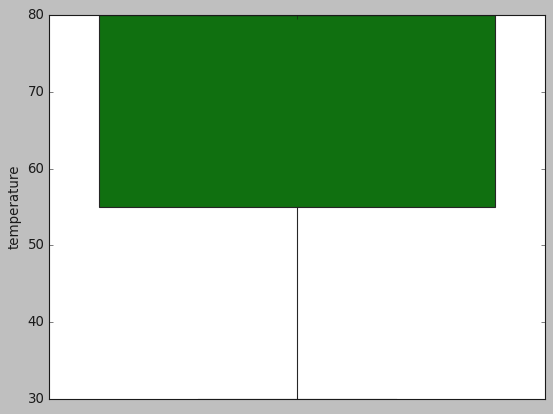

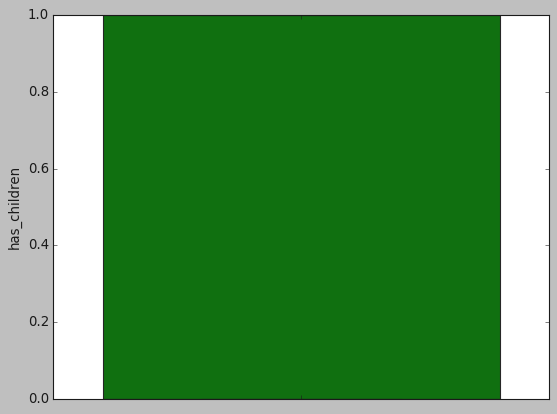

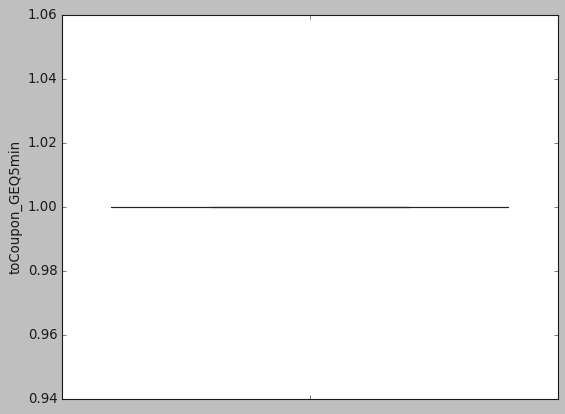

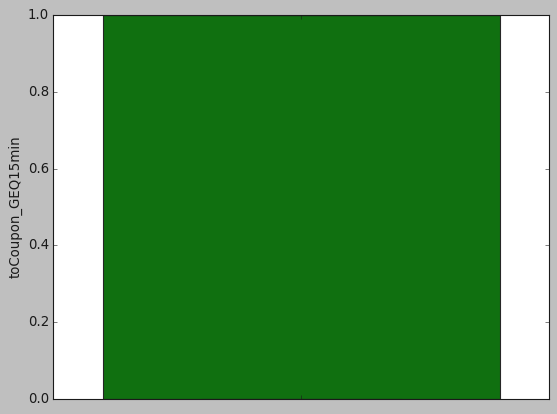

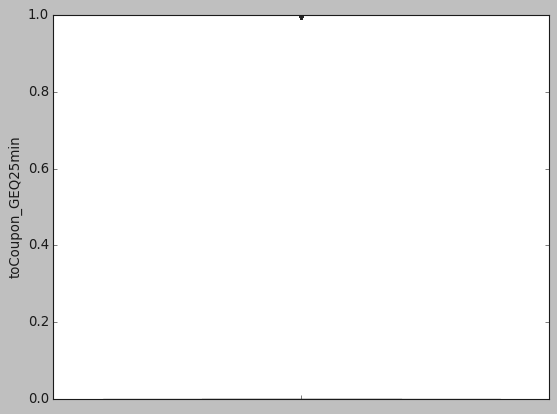

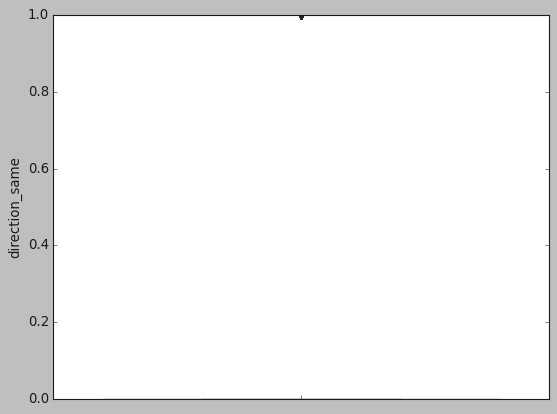

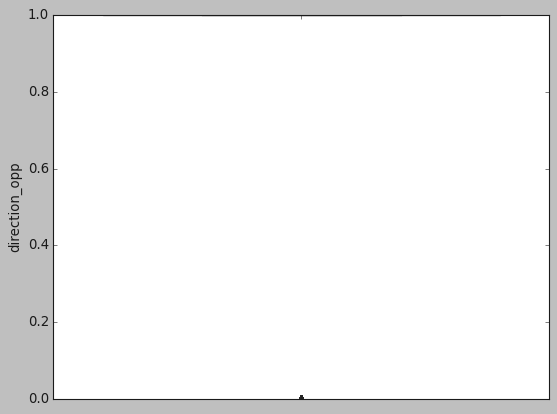

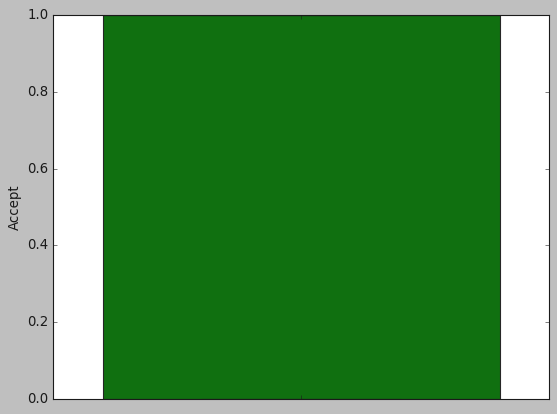

In [191]:
# Creating boxplot for all numerical columns checking for outlier

def boxplot(cols):
    sns.boxplot(y=data[cols])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns):
    boxplot(i)

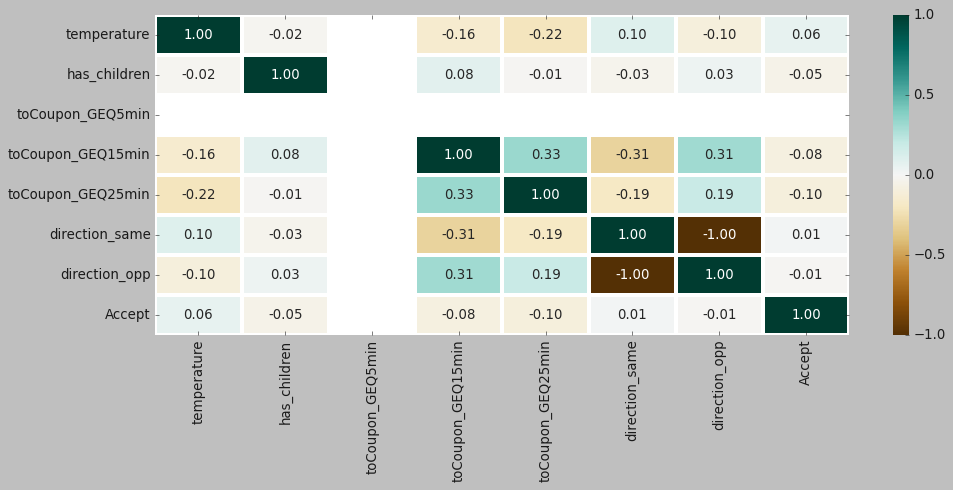

In [192]:
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,annot=True)
plt.show()

In [193]:
data=data.drop('toCoupon_GEQ5min', axis=1)

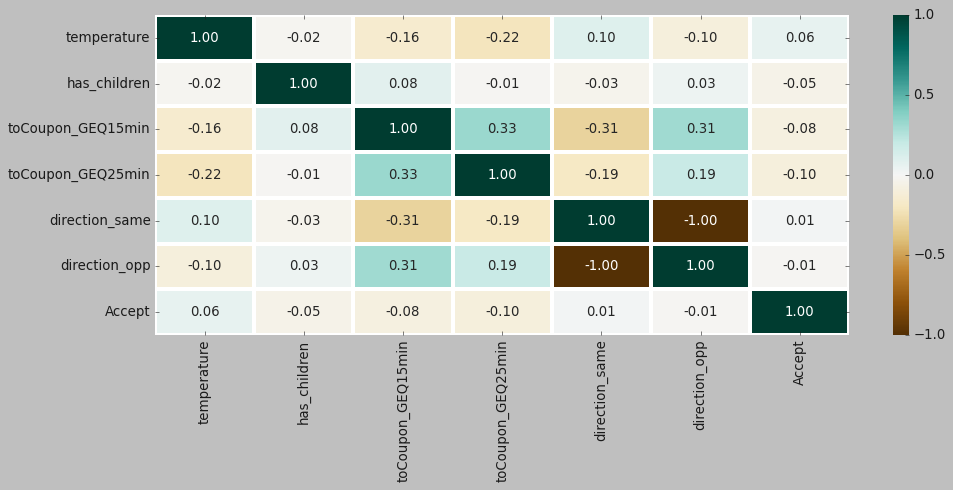

In [194]:
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,annot=True)
plt.show()

In [195]:
# FE -- to_Coupon is combination of two feature, toCoupon_GEQ15min and toCoupon_GEQ25min

to_Coupon = []
for i in tqdm(range(data.shape[0])):
    if (list(data['toCoupon_GEQ15min'])[i] == 0):
        to_Coupon.append(0)
    elif (list(data['toCoupon_GEQ15min'])[i] == 1)and(list(data['toCoupon_GEQ25min'])[i] == 0):
        to_Coupon.append(1)
    else:
        to_Coupon.append(2)
        
data['to_Coupon'] = to_Coupon

100%|███████████████████████████████████████████████████████████████████████████| 12079/12079 [00:52<00:00, 228.67it/s]


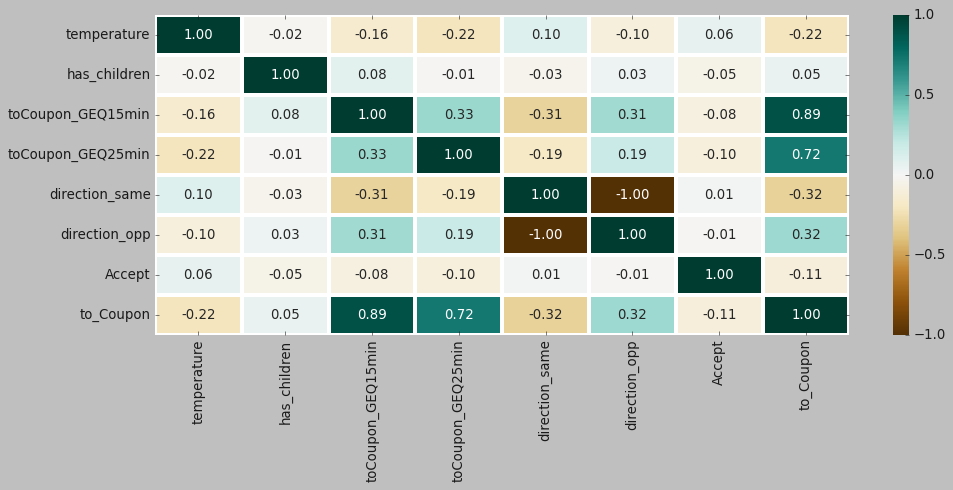

In [196]:
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,annot=True)
plt.show()

In [197]:
data.select_dtypes(include='object').columns

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [198]:
df=data.copy()

In [199]:
cols = [i for i in df.columns if df[i].dtype==object]
cols

['destination',
 'passanger',
 'weather',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [200]:
df=pd.get_dummies(df, columns=cols, drop_first=True)
df.head()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept,to_Coupon,destination_No Urgent Place,destination_Work,...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4 to 8,RestaurantLessThan20_Greater then 8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4 to 8,Restaurant20To50_Greater then 8,Restaurant20To50_less1,Restaurant20To50_never
22,55,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
23,80,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
24,80,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
25,80,0,1,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
26,80,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [201]:
x=df.drop(['Accept'], axis=1).values
y=df['Accept'].values

In [202]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=17)

In [203]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [204]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=35,max_depth=40,max_leaf_nodes=90)
dt=dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
y_pred_train=dtc.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
dt_train=dt.score(x_train, y_train)
print("Training score: ",dt_train)
dt_test = dt.score(x_test, y_test)
print("Testing score: ",dt_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_dtc = dtc.predict(x_train)
y_pred_test_dtc = dtc.predict(x_test)

print(classification_report(y_train, y_pred_train_dtc))
print("**********"*10)
print(classification_report(y_test, y_pred_test_dtc))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score -0.22259902648575364
Cross Validation Testing Score -0.32657895679051124
***************************************************Report Training And Testing Score**********************************
Training score:  0.7300010348752975
Testing score:  0.6986754966887417
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      4181
           1       0.75      0.79      0.77      5482

    accuracy                           0.73      9663
   macro avg       0.73      0.72      0.72      9663
weighted avg       0.73      0.73      0.73      9663

****************************************************************************************************
              precision    recall  f1-s

In [205]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rf=rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred_train=rfc.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
rf_train=rf.score(x_train, y_train)
print("Training score: ",rf_train)
rf_test = rf.score(x_test, y_test)
print("Testing score: ",rf_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train_rfc))
print("**********"*10)
print(classification_report(y_test, y_pred_test_rfc))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score -0.22259902648575364
Cross Validation Testing Score -0.32657895679051124
***************************************************Report Training And Testing Score**********************************
Training score:  0.9929628479768188
Testing score:  0.7562086092715232
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4181
           1       0.99      1.00      0.99      5482

    accuracy                           0.99      9663
   macro avg       0.99      0.99      0.99      9663
weighted avg       0.99      0.99      0.99      9663

****************************************************************************************************
              precision    recall  f1-s

In [206]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred=xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(xgb, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(xgb, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
xgb_train=xgb.score(x_train, y_train)
print("Training score: ",xgb_train)
xgb_test = xgb.score(x_test, y_test)
print("Testing score: ",xgb_test)
print("***************************************************Report Recall, F1Score, Precision**********************************")
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
print(classification_report(y_train, y_pred_train_xgb))
print("********"*10)
print(classification_report(y_test, y_pred_test_xgb))

***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.002514766992779194
Cross Validation Testing Score -0.14164972338030699
***************************************************Report Training And Testing Score**********************************
Training score:  0.8950636448307979
Testing score:  0.7591059602649006
***************************************************Report Recall, F1Score, Precision**********************************
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      4181
           1       0.89      0.93      0.91      5482

    accuracy                           0.90      9663
   macro avg       0.90      0.89      0.89      9663
weighted avg       0.90      0.90      0.89      9663

********************************************************************************
              precision    recall  f1-score   support

    

In [207]:
rf=RandomForestClassifier()
bag=BaggingClassifier()
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier()
dt=DecisionTreeClassifier()
log=LogisticRegression(class_weight="balanced",multi_class='ovr')

In [215]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*12)
    print("                       performance of ", model)
    print("##########"*12)
    cv=StratifiedShuffleSplit(n_splits=5,test_size=0.25,random_state=111)
    scoring=["f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,x,y,scoring=scoring,cv=cv)
    f1_test_cv=cross_val_scores["test_f1_macro"]
    precision_test_cv=cross_val_scores["test_precision_macro"].mean()
    recall_test_cv=cross_val_scores["test_recall_macro"].mean()
    
    print(f"f1 test score:{f1_test_cv.mean():.4f}")
    print(f"precision test score:{precision_test_cv:.4f}")
    print(f"recall test score:{recall_test_cv:.4f}")

########################################################################################################################
                       performance of  RandomForestClassifier()
########################################################################################################################
f1 test score:0.7456
precision test score:0.7515
recall test score:0.7430
########################################################################################################################
                       performance of  BaggingClassifier()
########################################################################################################################
f1 test score:0.7263
precision test score:0.7255
recall test score:0.7277
########################################################################################################################
                       performance of  GradientBoostingClassifier()
########################################################

In [209]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*12)
    print("                       Performance of ", model)
    print("##########"*12)
    
    abc=model.fit(x_train,y_train)
    y_pred=abc.predict(x_test)
    AC=accuracy_score(y_test,y_pred)
    #CR=classification_report(y_test,y_pred)
    CM=confusion_matrix(y_test,y_pred)
    #print("classification report \n",CR)
    print(f"Accuracy_score :{AC*100:.2f} %")
    print("\nconfusion_matrix: \n",CM)

########################################################################################################################
                       Performance of  RandomForestClassifier()
########################################################################################################################
Accuracy_score :75.08 %

confusion_matrix: 
 [[ 680  341]
 [ 261 1134]]
########################################################################################################################
                       Performance of  BaggingClassifier()
########################################################################################################################
Accuracy_score :73.63 %

confusion_matrix: 
 [[ 742  279]
 [ 358 1037]]
########################################################################################################################
                       Performance of  GradientBoostingClassifier()
############################################################

In [2]:
a = [0,1,2,3]
for a[-1] in a:
    print(a,a[-1])

[0, 1, 2, 0] 0
[0, 1, 2, 1] 1
[0, 1, 2, 2] 2
[0, 1, 2, 2] 2


In [ ]:
krish naik
campus x